## Acquisition Analytics : Group Case Study
### Problem Statement

CredX is a leading credit card provider that gets thousands of credit card applications every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’. 

In this project, your task is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, you need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project.

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#understanding demographic data first
demo = pd.read_csv("Demographic data.csv")
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [3]:
#checking for null values
demo.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

From above, we can see that there are few columns which contain null values.

In [4]:
# let's look at the first few rows of the dataframe
demo.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [5]:
# Looking at all the column names
demo.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

In [6]:
demo['Performance Tag'].value_counts()

0.0    66922
1.0     2948
Name: Performance Tag, dtype: int64

We can see from above that this is an unbalanced dataset

In [7]:
# Determine the percentage of people who have defaulted based on demographic data
100*(demo['Performance Tag'].sum()/demo['Performance Tag'].count()).round(4)

4.22

In [8]:
#understanding credit bureau data first
cr = pd.read_csv("Credit Bureau data.csv")
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [9]:
#checking for null values
cr.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 


From above, we can see that there are few columns which contain null values.

In [10]:
# Looking at all the column names
cr.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')

In [11]:
cr['Performance Tag'].value_counts()

0.0    66922
1.0     2948
Name: Performance Tag, dtype: int64

Credit bureau data is also imbalanced

In [12]:
# Determine the percentage of people who have defaulted based on credit bureau data
100*(cr['Performance Tag'].sum()/cr['Performance Tag'].count()).round(4)

4.22

### Exploratory Data Analysis (Demographic data)

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

#### Age

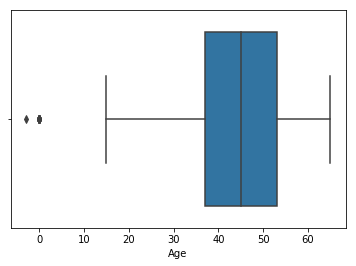

In [13]:
sns.boxplot(x='Age', data=demo)
plt.show()

In [14]:
# Removing the outliers with age < 18, we will club all of those ages at 18 since 
# ages less than 18 are anyways not correct entries

demo['Age'][demo['Age']<18] = 18

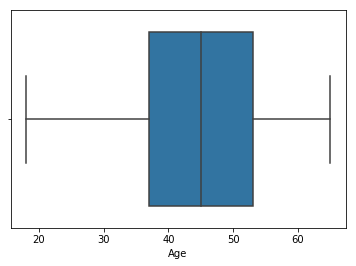

In [15]:
sns.boxplot(x='Age', data=demo)
plt.show()

In [16]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the default rates

bins = np.arange(10,demo['Age'].max() + 10, 10)
demo['age_bins'] = pd.cut(demo['Age'], bins, include_lowest=True)

In [17]:
No_of_prospect = demo.groupby('age_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')

In [18]:
count_prospects = demo[demo['Performance Tag']==1].groupby('age_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')

In [19]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [20]:
agg_age['default_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [21]:
agg_age

,age_bins,No.of_prospect,count_prospects,default_rate
0,"(9.999, 20.0]",141,3,2.1
1,"(20.0, 30.0]",5807,238,4.1
2,"(30.0, 40.0]",18690,831,4.4
3,"(40.0, 50.0]",22872,958,4.2
4,"(50.0, 60.0]",17535,718,4.1
5,"(60.0, 70.0]",4825,200,4.1


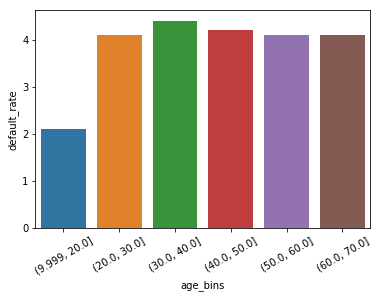

In [22]:
ax = sns.barplot(x='age_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, we cant really differentiate on the default rate on the basis of age as all the bins has almost the same default rate. (the forst bin can be ingnored as there are negligible count of people in that bin as seen from the table above)

In [23]:
# Note that we have added a new column named age bucket to the table

demo.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,age_bins
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]"


Similarly, we will look at the relation between default rate and gender.

#### Gender

In [24]:
demo['Gender'].value_counts(dropna = False)

M      54456
F      16837
NaN        2
Name: Gender, dtype: int64

In [25]:
# replacing the two missing values with the Mode "M"
demo['Gender'].fillna('M', inplace=True)

demo['Gender'].value_counts(dropna=False)

M    54458
F    16837
Name: Gender, dtype: int64

In [26]:
count_prospects_gender = demo.groupby('Gender')['Performance Tag'].sum().reset_index(name = 'count_prospects')

In [27]:
No_of_prospect_gender = demo.groupby('Gender')['Performance Tag'].count().reset_index(name = 'No_of_prospects')

In [28]:
agg_gender = count_prospects_gender.merge(No_of_prospect_gender, on = 'Gender')

In [29]:
agg_gender['default_rate'] = 100*(agg_gender['count_prospects']/agg_gender['No_of_prospects']).round(4)

In [30]:
agg_gender

,Gender,count_prospects,No_of_prospects,default_rate
0,F,718.0,16506,4.35
1,M,2230.0,53364,4.18


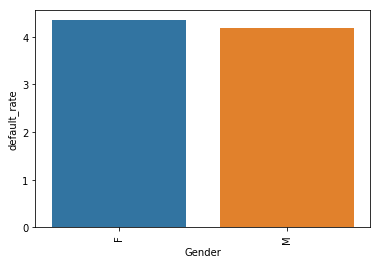

In [31]:
ax = sns.barplot(x='Gender', y='default_rate', data=agg_gender)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we couldnt differentiate in the default rate on the basis of age; similarly from above we can see that we cannot differentiate on the basis of Gender either.

#### Marital Status

In [32]:
demo['Marital Status (at the time of application)'].value_counts(dropna=False)

Married    60730
Single     10559
NaN            6
Name: Marital Status (at the time of application), dtype: int64

Since there 6 null values, we will assign them to the biggest group (mode), which is, 'Married'.

In [33]:
# replacing the six missing values with the Mode "Married"
demo['Marital Status (at the time of application)'].fillna('Married', inplace=True)

demo['Marital Status (at the time of application)'].value_counts(dropna=False)

Married    60736
Single     10559
Name: Marital Status (at the time of application), dtype: int64

In [34]:
count_prospects_ms = demo.groupby('Marital Status (at the time of application)')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_ms = demo.groupby('Marital Status (at the time of application)')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_ms = count_prospects_ms.merge(No_of_prospect_ms, on = 'Marital Status (at the time of application)')
agg_ms['default_rate'] = 100*(agg_ms['count_prospect']/agg_ms['no_of_prospect']).round(4)

In [35]:
agg_ms

,Marital Status (at the time of application),count_prospect,no_of_prospect,default_rate
0,Married,2503.0,59553,4.20
1,Single,445.0,10317,4.31


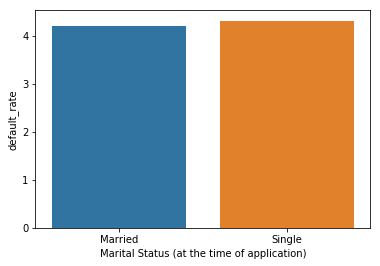

In [36]:
ax = sns.barplot(x='Marital Status (at the time of application)', y='default_rate', data=agg_ms)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Again, nothing can be said on default rate on the basis of Marital status

#### No of dependents

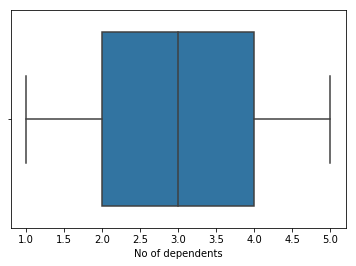

In [37]:
sns.boxplot(x='No of dependents', data=demo)
plt.show()

In [38]:
demo['No of dependents'].value_counts(dropna=False)

 3.0    16279
 1.0    15387
 2.0    15289
 4.0    12222
 5.0    12115
NaN         3
Name: No of dependents, dtype: int64

In [39]:
# replacing the three missing values with the 50th percentile '3.0'
demo['No of dependents'].fillna(3.0, inplace=True)

demo['No of dependents'].value_counts(dropna=False)

3.0    16282
1.0    15387
2.0    15289
4.0    12222
5.0    12115
Name: No of dependents, dtype: int64

In [40]:
count_prospects_dependents = demo.groupby('No of dependents')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_dependents = demo.groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_dependents = count_prospects_dependents.merge(No_of_prospect_dependents, on = 'No of dependents')
agg_dependents['default_rate'] = 100*(agg_dependents['count_prospect']/agg_dependents['no_of_prospect']).round(4)

In [41]:
agg_dependents

,No of dependents,count_prospect,no_of_prospect,default_rate
0,1.0,667.0,15218,4.38
1,2.0,588.0,15128,3.89
2,3.0,695.0,15648,4.44
3,4.0,494.0,12000,4.12
4,5.0,504.0,11876,4.24


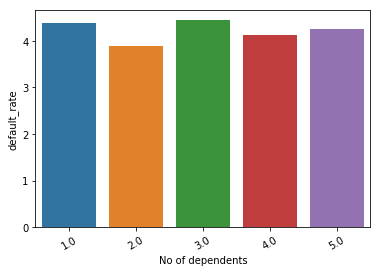

In [42]:
ax = sns.barplot(x='No of dependents', y='default_rate', data=agg_dependents)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

Although most of the entris have almost same default rate, but people with number of dependents as 1 and 3 have slightly higher default rate than others.

#### Income

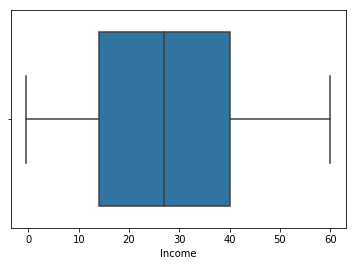

In [43]:
sns.boxplot(x='Income', data=demo)
plt.show()

We will bucket the data same as we did with Age

In [44]:
# bucketing the data based on the income to study the default rate
bins = np.arange(0,demo['Income'].max() + 10, 10) 
demo['Income_bin'] = pd.cut(demo['Income'], bins, include_lowest=True)

In [45]:
No_of_prospect_income = demo.groupby('Income_bin')['Performance Tag'].count().reset_index(name = 'no_of_prospect')
count_prospects_income = demo[demo['Performance Tag']==1].groupby('Income_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_income = No_of_prospect_income.merge(count_prospects_income, on='Income_bin')
agg_income['default_rate'] = 100*(agg_income['count_prospect']/agg_income['no_of_prospect']).round(3)

In [46]:
agg_income

,Income_bin,no_of_prospect,count_prospect,default_rate
0,"(-0.001, 10.0]",12761,711,5.6
1,"(10.0, 20.0]",13349,604,4.5
2,"(20.0, 30.0]",13587,601,4.4
3,"(30.0, 40.0]",13636,485,3.6
4,"(40.0, 50.0]",10844,384,3.5
5,"(50.0, 60.0]",5612,161,2.9


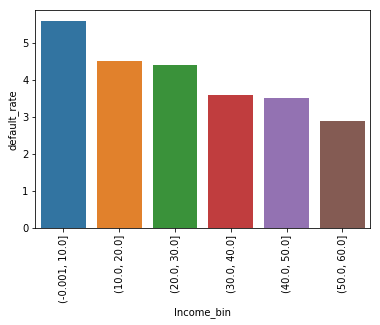

In [47]:
ax = sns.barplot(x='Income_bin', y='default_rate', data=agg_income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

From above we can clearly see that default rate decreases with rise in income. 

#### Education

In [48]:
demo['Education'].value_counts(dropna=False)

Professional    24839
Masters         23970
Bachelor        17697
Phd              4549
Others            121
NaN               119
Name: Education, dtype: int64

In [49]:
count_prospects_education = demo.groupby('Education')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_education = demo.groupby('Education')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'Education')
agg_education['default_rate'] = 100*(agg_education['count_prospect']/agg_education['no_of_prospect']).round(3)

In [50]:
agg_education

,Education,count_prospect,no_of_prospect,default_rate
0,Bachelor,742.0,17302,4.3
1,Masters,998.0,23481,4.3
2,Others,8.0,119,6.7
3,Phd,184.0,4464,4.1
4,Professional,1011.0,24386,4.1


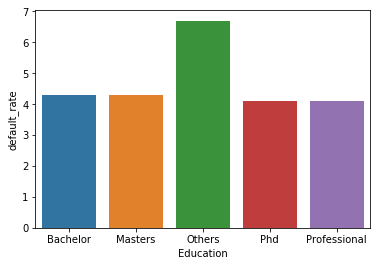

In [51]:
ax = sns.barplot(x='Education', y='default_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can see that most of the defaulters belong to the group that have education as 'Other'  which is most probably the people having education less than a bachelors degree

#### Profession

In [52]:
demo['Profession '].value_counts(dropna=False)

SAL        40439
SE_PROF    16535
SE         14307
NaN           14
Name: Profession , dtype: int64

In [53]:
# replacing the fourteen missing values with the Mode "SAL"
demo['Profession '].fillna('SAL', inplace=True)

demo['Profession '].value_counts(dropna=False)

SAL        40453
SE_PROF    16535
SE         14307
Name: Profession , dtype: int64

In [54]:
count_prospects_profession = demo.groupby('Profession ')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_profession = demo.groupby('Profession ')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_profession = count_prospects_profession.merge(No_of_prospect_profession, on = 'Profession ')
agg_profession['default_rate'] = 100*(agg_profession['count_prospect']/agg_profession['no_of_prospect']).round(3)

In [55]:
agg_profession

,Profession,count_prospect,no_of_prospect,default_rate
0,SAL,1629.0,39687,4.1
1,SE,642.0,13927,4.6
2,SE_PROF,677.0,16256,4.2


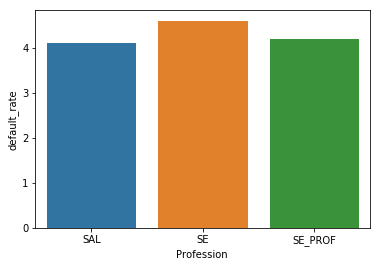

In [56]:
ax = sns.barplot(x='Profession ', y='default_rate', data=agg_profession)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Cannot really differentiate based on profession

#### Type of Residence

In [57]:
demo['Type of residence'].value_counts(dropna=False)

Rented                 53397
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
NaN                        8
Name: Type of residence, dtype: int64

In [58]:
# replacing the eight missing values with the Mode "Rented"
demo['Type of residence'].fillna('Rented', inplace=True)

demo['Type of residence'].value_counts(dropna=False)

Rented                 53405
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
Name: Type of residence, dtype: int64

In [59]:
count_prospects_residence = demo.groupby('Type of residence')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_residence = demo.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_residence = count_prospects_residence.merge(No_of_prospect_residence, on = 'Type of residence')
agg_residence['default_rate'] = 100*(agg_residence['count_prospect']/agg_residence['no_of_prospect']).round(3)

In [60]:
agg_residence

,Type of residence,count_prospect,no_of_prospect,default_rate
0,Company provided,73.0,1603,4.6
1,Living with Parents,80.0,1778,4.5
2,Others,5.0,198,2.5
3,Owned,593.0,14003,4.2
4,Rented,2197.0,52288,4.2


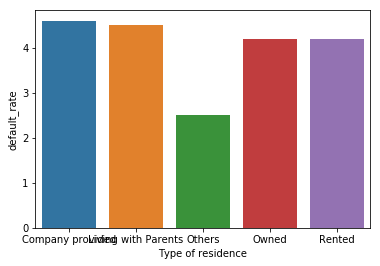

In [61]:
ax = sns.barplot(x='Type of residence', y='default_rate', data=agg_residence)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Apart from people living in Residence Type - "Others", almost all other categories have same default rate

#### No of months in current residence

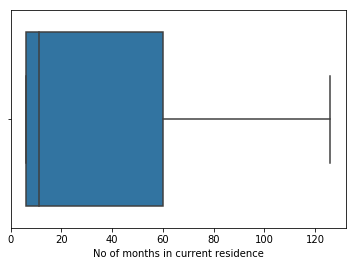

In [62]:
sns.boxplot(x='No of months in current residence', data=demo)
plt.show()

We will bucket this similar to Age and Income

In [63]:
# bucketing the data based on the current residence duration to study the default rate
bins = np.arange(0,demo['No of months in current residence'].max() + 10, 12) 
demo['Residence_bin'] = pd.cut(demo['No of months in current residence'], bins, include_lowest=True)

In [64]:
No_of_prospect_res = demo.groupby('Residence_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_res = demo[demo['Performance Tag']==1].groupby('Residence_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_res = No_of_prospect_res.merge(count_prospects_res, on='Residence_bin')
agg_res['default_rate'] = 100*(agg_res['count_prospect']/agg_res['noof_prospect']).round(3)

In [65]:
agg_res

,Residence_bin,noof_prospect,count_prospect,default_rate
0,"(-0.001, 12.0]",35855,1217,3.4
1,"(12.0, 24.0]",4399,283,6.4
2,"(24.0, 36.0]",4183,263,6.3
3,"(36.0, 48.0]",4074,216,5.3
4,"(48.0, 60.0]",3823,210,5.5
5,"(60.0, 72.0]",3483,146,4.2
6,"(72.0, 84.0]",3401,173,5.1
7,"(84.0, 96.0]",3272,145,4.4
8,"(96.0, 108.0]",3412,133,3.9
9,"(108.0, 120.0]",3049,112,3.7


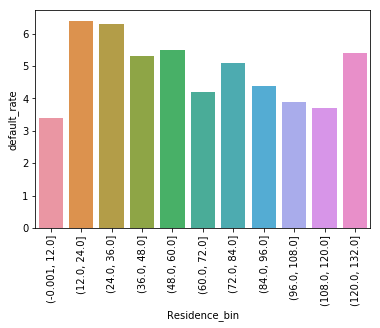

In [66]:
ax = sns.barplot(x='Residence_bin', y='default_rate', data=agg_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

From above we can see that people living in their current residence between 1 year and 3 years are more likely to default

#### No of months in current company

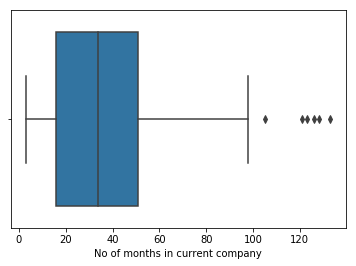

In [67]:
sns.boxplot(x='No of months in current company', data=demo)
plt.show()

In [68]:
# grouping the outliers of more than 100 months to 100 months, 
# as there would not be much difference in the behaviour of people who are employed for 100+ months with their current employer
demo['No of months in current company'][demo['No of months in current company']>100] = 100

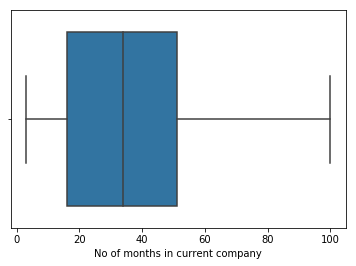

In [69]:
sns.boxplot(x='No of months in current company', data=demo)
plt.show()

Again lets bucket the data

In [70]:
# bucketing the data based on the current employment duration to study the default rate
bins = np.arange(0,demo['No of months in current company'].max() + 10, 12) 
demo['Employment_bin'] = pd.cut(demo['No of months in current company'], bins, include_lowest=True)

In [71]:
No_of_prospect_emp = demo.groupby('Employment_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_emp = demo[demo['Performance Tag']==1].groupby('Employment_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_emp = No_of_prospect_emp.merge(count_prospects_emp, on='Employment_bin')
agg_emp['default_rate'] = 100*(agg_emp['count_prospect']/agg_emp['noof_prospect']).round(3)

In [72]:
agg_emp

,Employment_bin,noof_prospect,count_prospect,default_rate
0,"(-0.001, 12.0]",13488,649,4.8
1,"(12.0, 24.0]",11872,572,4.8
2,"(24.0, 36.0]",12108,503,4.2
3,"(36.0, 48.0]",12427,476,3.8
4,"(48.0, 60.0]",12106,402,3.3
5,"(60.0, 72.0]",6547,288,4.4
6,"(72.0, 84.0]",1313,58,4.4
7,"(84.0, 96.0]",2,0,0.0
8,"(96.0, 108.0]",7,0,0.0


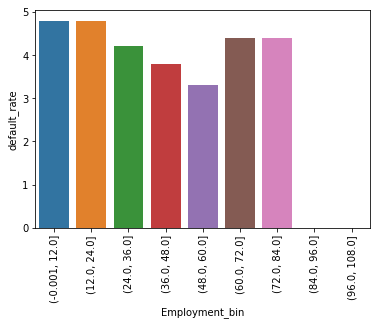

In [73]:
ax = sns.barplot(x='Employment_bin', y='default_rate', data=agg_emp)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

From above we can see that people working in their current company for upto 24 months are most likely to default

### Bivariate analysis on demographic data

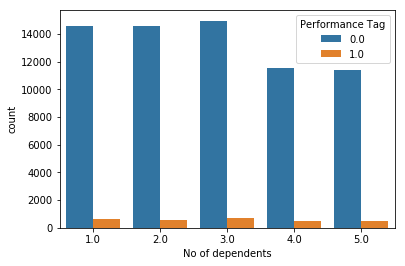

In [74]:
sns.countplot(data=demo, x = 'No of dependents',hue = 'Performance Tag')

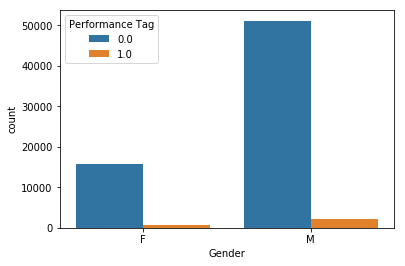

In [75]:
sns.countplot(data=demo, x = 'Gender',hue = 'Performance Tag')

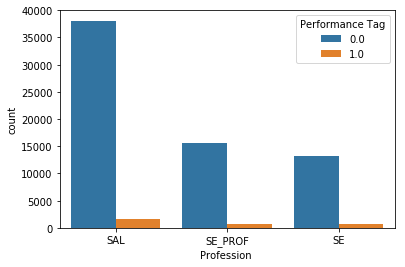

In [76]:
sns.countplot(data=demo, x = 'Profession ',hue = 'Performance Tag')

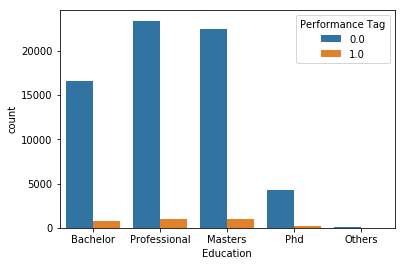

In [77]:
p = sns.countplot(data=demo, x = 'Education',hue = 'Performance Tag')

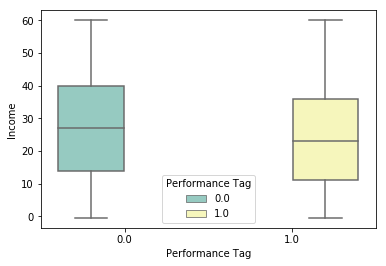

In [78]:
sns.boxplot(x="Performance Tag", y="Income", hue="Performance Tag", data=demo, palette="Set3")

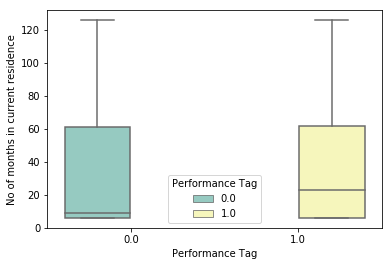

In [79]:
sns.boxplot(x="Performance Tag", y="No of months in current residence", hue="Performance Tag", data=demo, palette="Set3")

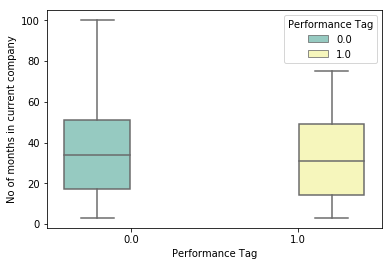

In [80]:
sns.boxplot(x="Performance Tag", y="No of months in current company", hue="Performance Tag", data=demo, palette="Set3")

### Exploratory Data Analysis (Credit Bureau data)

Now, we will do Exploratory Data Analysis on individual features of Credit data.

In [81]:
cr.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')

#### No of times 60 DPD or worse in last 6 months

In [82]:
cr['No of times 90 DPD or worse in last 6 months'].value_counts(dropna=False)

0    54869
1    13874
2     2258
3      294
Name: No of times 90 DPD or worse in last 6 months, dtype: int64

In [83]:
count_prospects_90DPD6M = cr.groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_90DPD6M = cr.groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_90DPD6M = count_prospects_90DPD6M.merge(No_of_prospect_90DPD6M, on = 'No of times 90 DPD or worse in last 6 months')
agg_90DPD6M['default_rate'] = 100*(agg_90DPD6M['count_prospect']/agg_90DPD6M['no_of_prospect']).round(3)

In [84]:
agg_90DPD6M

,No of times 90 DPD or worse in last 6 months,count_prospect,no_of_prospect,default_rate
0,0,1794.0,54666,3.3
1,1,971.0,13220,7.3
2,2,160.0,1776,9.0
3,3,23.0,208,11.1


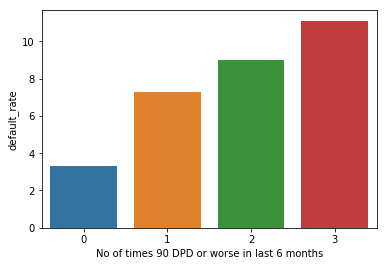

In [85]:
bp = sns.barplot(x='No of times 90 DPD or worse in last 6 months', y='default_rate', data=agg_90DPD6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

As expected, default rate increases with frequency in delay of payments

#### No of times 60 DPD or worse in last 6 months

In [86]:
cr['No of times 60 DPD or worse in last 6 months'].value_counts(dropna=False)

0    51923
1    11395
2     5412
3     1876
4      597
5       92
Name: No of times 60 DPD or worse in last 6 months, dtype: int64

In [87]:
count_prospects_60DPD6M = cr.groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_60DPD6M = cr.groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_60DPD6M = count_prospects_60DPD6M.merge(No_of_prospect_60DPD6M, on = 'No of times 60 DPD or worse in last 6 months')
agg_60DPD6M['default_rate'] = 100*(agg_60DPD6M['count_prospect']/agg_60DPD6M['no_of_prospect']).round(3)

In [88]:
agg_60DPD6M

,No of times 60 DPD or worse in last 6 months,count_prospect,no_of_prospect,default_rate
0,0,1582.0,51871,3.0
1,1,784.0,11132,7.0
2,2,389.0,4917,7.9
3,3,148.0,1469,10.1
4,4,39.0,411,9.5
5,5,6.0,70,8.6


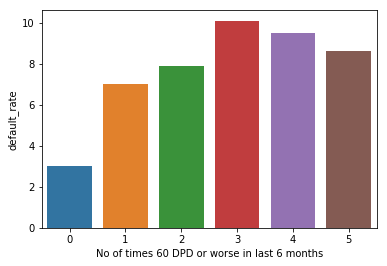

In [89]:
bp = sns.barplot(x='No of times 60 DPD or worse in last 6 months', y='default_rate', data=agg_60DPD6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

The default rate increases with frequency of delay in payments until 3 times and then there is a sligth dip for frequency equal to 4 and 5

#### No of times 30 DPD or worse in last 6 months


In [90]:
cr['No of times 30 DPD or worse in last 6 months'].value_counts(dropna=False)

0    50109
1     9610
2     6195
3     3269
4     1389
5      565
6      142
7       16
Name: No of times 30 DPD or worse in last 6 months, dtype: int64

In [91]:
count_prospects_30DPD6M = cr.groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_30DPD6M = cr.groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_30DPD6M = count_prospects_30DPD6M.merge(No_of_prospect_30DPD6M, on = 'No of times 30 DPD or worse in last 6 months')
agg_30DPD6M['default_rate'] = 100*(agg_30DPD6M['count_prospect']/agg_30DPD6M['no_of_prospect']).round(3)

In [92]:
agg_30DPD6M

,No of times 30 DPD or worse in last 6 months,count_prospect,no_of_prospect,default_rate
0,0,1455.0,50099,2.9
1,1,623.0,9501,6.6
2,2,466.0,5898,7.9
3,3,245.0,2830,8.7
4,4,107.0,1045,10.2
5,5,43.0,386,11.1
6,6,8.0,96,8.3
7,7,1.0,15,6.7


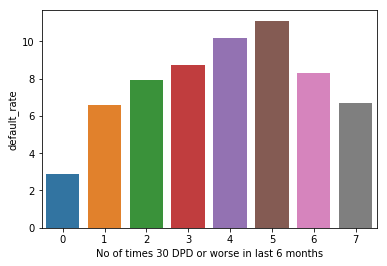

In [93]:
bp = sns.barplot(x='No of times 30 DPD or worse in last 6 months', y='default_rate', data=agg_30DPD6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

Similar to 60DPD, here also default rate increases with freqency of delay for upto 5 times and then slight dip for frequency of 6 and 7

#### No of times 90 DPD or worse in last 12 months

In [94]:
cr['No of times 90 DPD or worse in last 12 months'].value_counts(dropna=False)

0    50541
1    11991
2     6655
3     1672
4      390
5       46
Name: No of times 90 DPD or worse in last 12 months, dtype: int64

In [95]:
count_prospects_90DPD12M = cr.groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_90DPD12M = cr.groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_90DPD12M = count_prospects_90DPD12M.merge(No_of_prospect_90DPD12M, on = 'No of times 90 DPD or worse in last 12 months')
agg_90DPD12M['default_rate'] = 100*(agg_90DPD12M['count_prospect']/agg_90DPD12M['no_of_prospect']).round(3)

In [96]:
agg_90DPD12M

,No of times 90 DPD or worse in last 12 months,count_prospect,no_of_prospect,default_rate
0,0,1510.0,50494,3.0
1,1,796.0,11663,6.8
2,2,489.0,6161,7.9
3,3,120.0,1244,9.6
4,4,28.0,272,10.3
5,5,5.0,36,13.9


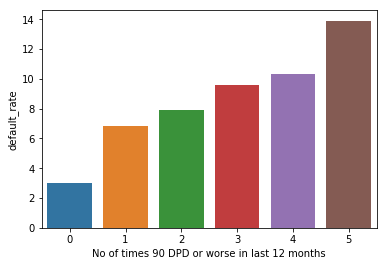

In [97]:
bp = sns.barplot(x='No of times 90 DPD or worse in last 12 months', y='default_rate', data=agg_90DPD12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

As expected, default rate increases quite clearly with increase in frequency of delay of payments

#### No of times 60 DPD or worse in last 12 months

In [98]:
cr['No of times 60 DPD or worse in last 12 months'].value_counts(dropna=False)

0    45881
1    12927
2     6697
3     3643
4     1420
5      569
6      148
7       10
Name: No of times 60 DPD or worse in last 12 months, dtype: int64

In [99]:
count_prospects_60DPD12M = cr.groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_60DPD12M = cr.groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_60DPD12M = count_prospects_60DPD12M.merge(No_of_prospect_60DPD12M, on = 'No of times 60 DPD or worse in last 12 months')
agg_60DPD12M['default_rate'] = 100*(agg_60DPD12M['count_prospect']/agg_60DPD12M['no_of_prospect']).round(3)

In [100]:
agg_60DPD12M

,No of times 60 DPD or worse in last 12 months,count_prospect,no_of_prospect,default_rate
0,0,1378.0,45869,3.0
1,1,663.0,12816,5.2
2,2,483.0,6416,7.5
3,3,274.0,3205,8.5
4,4,101.0,1048,9.6
5,5,36.0,398,9.0
6,6,13.0,111,11.7
7,7,0.0,7,0.0


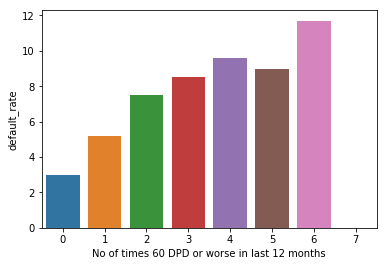

In [101]:
bp = sns.barplot(x='No of times 60 DPD or worse in last 12 months', y='default_rate', data=agg_60DPD12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

Again default rate increases with increase in frequency of delay of payments

#### No of times 30 DPD or worse in last 12 months

In [102]:
cr['No of times 30 DPD or worse in last 12 months'].value_counts(dropna=False)

0    44863
1    11502
2     6266
3     4451
4     2309
5     1166
6      549
7      160
8       27
9        2
Name: No of times 30 DPD or worse in last 12 months, dtype: int64

In [103]:
count_prospects_30DPD12M = cr.groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_30DPD12M = cr.groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'no_of_prospect')

agg_30DPD12M = count_prospects_30DPD12M.merge(No_of_prospect_30DPD12M, on = 'No of times 30 DPD or worse in last 12 months')
agg_30DPD12M['default_rate'] = 100*(agg_30DPD12M['count_prospect']/agg_30DPD12M['no_of_prospect']).round(3)

In [104]:
agg_30DPD12M

,No of times 30 DPD or worse in last 12 months,count_prospect,no_of_prospect,default_rate
0,0,1316.0,44858,2.9
1,1,518.0,11474,4.5
2,2,452.0,6117,7.4
3,3,349.0,4137,8.4
4,4,173.0,1924,9.0
5,5,89.0,853,10.4
6,6,38.0,376,10.1
7,7,11.0,107,10.3
8,8,2.0,23,8.7
9,9,0.0,1,0.0


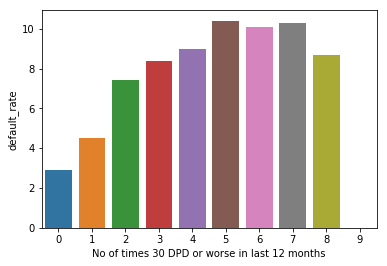

In [105]:
bp = sns.barplot(x='No of times 30 DPD or worse in last 12 months', y='default_rate', data=agg_30DPD12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

#### Avgas CC Utilization in last 12 months

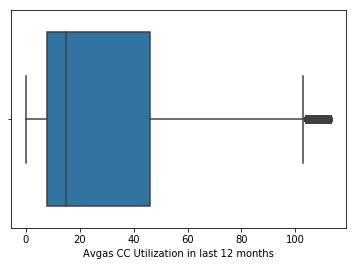

In [106]:
sns.boxplot(x='Avgas CC Utilization in last 12 months', data=cr)
plt.show()

We will bucket this column as we did for few columns in demographic dataset

In [107]:
# bucketing the data based on the card utilization in last 1 year to study the default rate
bins = np.arange(0,cr['Avgas CC Utilization in last 12 months'].max() + 10, 20) 
cr['CC_bin'] = pd.cut(cr['Avgas CC Utilization in last 12 months'], bins, include_lowest=True)

In [108]:
No_of_prospect_cc = cr.groupby('CC_bin')['Performance Tag'].count().reset_index(name = 'no_of_prospect')
count_prospects_cc = cr[cr['Performance Tag']==1].groupby('CC_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_cc = No_of_prospect_cc.merge(count_prospects_cc, on='CC_bin')
agg_cc['default_rate'] = 100*(agg_cc['count_prospect']/agg_cc['no_of_prospect']).round(3)

In [109]:
agg_cc

,CC_bin,no_of_prospect,count_prospect,default_rate
0,"(-0.001, 20.0]",40232,977,2.4
1,"(20.0, 40.0]",9173,589,6.4
2,"(40.0, 60.0]",9033,664,7.4
3,"(60.0, 80.0]",5131,385,7.5
4,"(80.0, 100.0]",1653,107,6.5
5,"(100.0, 120.0]",3625,178,4.9


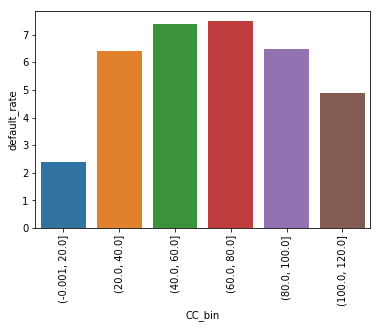

In [110]:
bp = sns.barplot(x='CC_bin', y='default_rate', data=agg_cc)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

From above we can see that people utilising their credit cards between 40 to 80% are most likely to default

#### No of trades opened in last 6 months

In [111]:
cr['No of trades opened in last 6 months'].value_counts(dropna=False)

 1.0     20251
 2.0     12462
 0.0     12231
 3.0      9851
 4.0      6624
 5.0      3791
 6.0      2349
 7.0      1649
 8.0      1154
 9.0       618
 10.0      238
 11.0       65
 12.0       11
NaN          1
Name: No of trades opened in last 6 months, dtype: int64

In [112]:
# imputing the single NULL value with the Mode '1.0'
cr['No of trades opened in last 6 months'].fillna(1.0, inplace=True)

In [113]:
count_prospects_T6M = cr.groupby('No of trades opened in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_T6M = cr.groupby('No of trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_T6M = count_prospects_T6M.merge(No_of_prospect_T6M, on = 'No of trades opened in last 6 months')
agg_T6M['default_rate'] = 100*(agg_T6M['count_prospect']/agg_T6M['noof_prospect']).round(3)

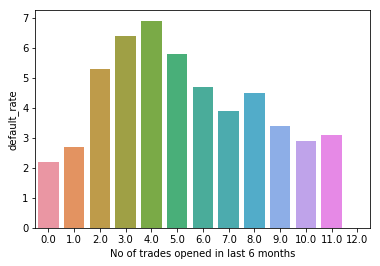

In [114]:
bp = sns.barplot(x='No of trades opened in last 6 months', y='default_rate', data=agg_T6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

People who have opened between 2 and 5 trades in last six months are most likely to default

#### No of trades opened in last 12 months

In [115]:
cr['No of trades opened in last 12 months'].value_counts(dropna=False)

1     11380
2      9342
0      4957
4      4925
3      4713
5      4658
6      4391
7      4303
8      3995
9      3573
10     2994
11     2293
12     1762
13     1406
14     1124
15     1068
16      992
17      860
18      736
19      612
20      434
21      308
22      218
23      121
24       73
25       34
26       11
27        9
28        3
Name: No of trades opened in last 12 months, dtype: int64

In [116]:
count_prospects_T12M = cr.groupby('No of trades opened in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_T12M = cr.groupby('No of trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_T12M = count_prospects_T12M.merge(No_of_prospect_T12M, on = 'No of trades opened in last 12 months')
agg_T12M['default_rate'] = 100*(agg_T12M['count_prospect']/agg_T12M['noof_prospect']).round(3)

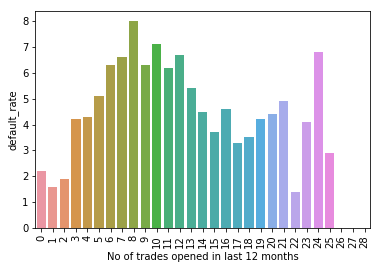

In [117]:
bp = sns.barplot(x='No of trades opened in last 12 months', y='default_rate', data=agg_T12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

#### No of PL trades opened in last 6 months

In [118]:
cr['No of PL trades opened in last 6 months'].value_counts(dropna=False)

0    31194
1    13854
2    13079
3     8320
4     3462
5     1090
6      296
Name: No of PL trades opened in last 6 months, dtype: int64

In [119]:
count_prospects_PL6M = cr.groupby('No of PL trades opened in last 6 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_PL6M = cr.groupby('No of PL trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_PL6M = count_prospects_PL6M.merge(No_of_prospect_PL6M, on = 'No of PL trades opened in last 6 months')
agg_PL6M['default_rate'] = 100*(agg_PL6M['count_prospect']/agg_PL6M['noof_prospect']).round(3)

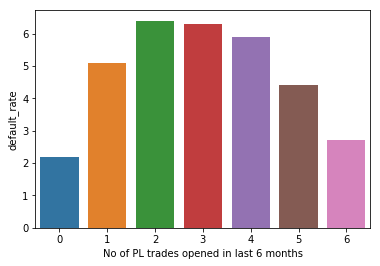

In [120]:
bp = sns.barplot(x='No of PL trades opened in last 6 months', y='default_rate', data=agg_PL6M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

People who have done 2 or 3 PL trades in last 6 months are most likely to default

#### No of PL trades opened in last 12 months

In [121]:
cr['No of PL trades opened in last 12 months'].value_counts(dropna=False)

0     25829
3      8433
4      8273
2      6982
1      6693
5      6485
6      4206
7      2284
8      1178
9       601
10      255
11       66
12       10
Name: No of PL trades opened in last 12 months, dtype: int64

In [122]:
count_prospects_PL12M = cr.groupby('No of PL trades opened in last 12 months')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_PL12M = cr.groupby('No of PL trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_PL12M = count_prospects_PL12M.merge(No_of_prospect_PL12M, on = 'No of PL trades opened in last 12 months')
agg_PL12M['default_rate'] = 100*(agg_PL12M['count_prospect']/agg_PL12M['noof_prospect']).round(3)

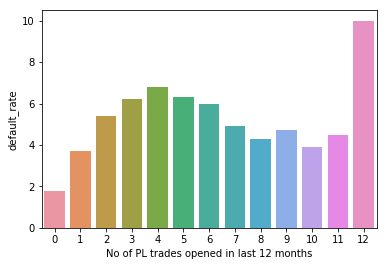

In [123]:
bp = sns.barplot(x='No of PL trades opened in last 12 months', y='default_rate', data=agg_PL12M)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

Clearly people who have done 12 PL trades in last one year are most likely to default

#### No of Inquiries in last 6 months (excluding home & auto loans)


In [124]:
cr['No of Inquiries in last 6 months (excluding home & auto loans)'].value_counts(dropna=False)

0     25176
1     13513
2     13350
3      7585
4      4385
5      3019
6      1750
7      1149
8       835
9       425
10      108
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: int64

In [125]:
count_prospects_inq6 = cr.groupby('No of Inquiries in last 6 months (excluding home & auto loans)')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_inq6 = cr.groupby('No of Inquiries in last 6 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_inq6 = count_prospects_inq6.merge(No_of_prospect_inq6, on = 'No of Inquiries in last 6 months (excluding home & auto loans)')
agg_inq6['default_rate'] = 100*(agg_inq6['count_prospect']/agg_inq6['noof_prospect']).round(3)

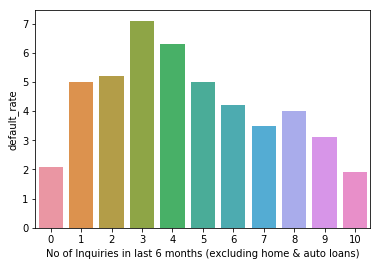

In [126]:
bp = sns.barplot(x='No of Inquiries in last 6 months (excluding home & auto loans)', y='default_rate', data=agg_inq6)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

#### No of Inquiries in last 12 months (excluding home & auto loans)

In [127]:
cr['No of Inquiries in last 12 months (excluding home & auto loans)'].value_counts(dropna=False)

0     20593
3      9283
2      8075
4      7491
5      5234
1      3932
6      3767
7      3054
8      2355
9      1777
10     1508
11     1231
12      936
13      789
14      553
15      360
16      212
17       97
18       40
19        6
20        2
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: int64

In [128]:
count_prospects_inq12 = cr.groupby('No of Inquiries in last 12 months (excluding home & auto loans)')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_inq12 = cr.groupby('No of Inquiries in last 12 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_inq12 = count_prospects_inq12.merge(No_of_prospect_inq12, on = 'No of Inquiries in last 12 months (excluding home & auto loans)')
agg_inq12['default_rate'] = 100*(agg_inq12['count_prospect']/agg_inq12['noof_prospect']).round(3)

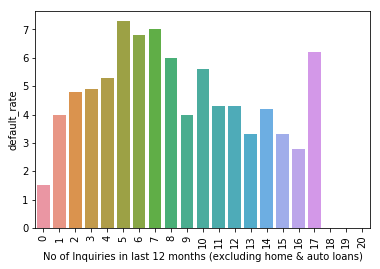

In [129]:
bp = sns.barplot(x='No of Inquiries in last 12 months (excluding home & auto loans)', y='default_rate', data=agg_inq12)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

People who have made enquiries between 5 to 8 times are more likely to default

#### Presence of open home loan

In [130]:
cr['Presence of open home loan'].value_counts(dropna=False)

 0.0    52811
 1.0    18212
NaN       272
Name: Presence of open home loan, dtype: int64

In [131]:
count_prospects_home = cr.groupby('Presence of open home loan')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_home = cr.groupby('Presence of open home loan')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_home = count_prospects_home.merge(No_of_prospect_home, on = 'Presence of open home loan')
agg_home['default_rate'] = 100*(agg_home['count_prospect']/agg_home['noof_prospect']).round(3)

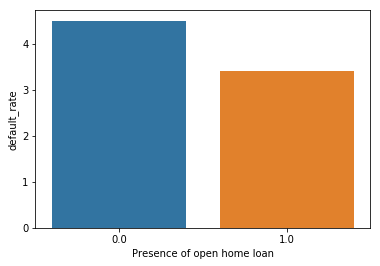

In [132]:
bp = sns.barplot(x='Presence of open home loan', y='default_rate', data=agg_home)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

Surprisingly people without a home loan are more likely to default than the ones who have an open home loan. But we can also see that number of people not having a home loan is also very less

#### Outstanding Balance

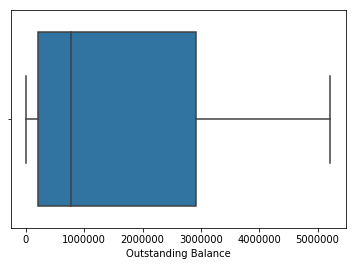

In [133]:
sns.boxplot(x='Outstanding Balance', data=cr)
plt.show()

We will bucket the data

In [134]:
# bucketing the data based on the outstanding balance on the customer to study the default rate
bins = np.arange(0,cr['Outstanding Balance'].max() + 100000, 500000) 
cr['O_bin'] = pd.cut(cr['Outstanding Balance'], bins, include_lowest=True)

In [135]:
No_of_prospect_bal = cr.groupby('O_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_bal = cr[cr['Performance Tag']==1].groupby('O_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_bal = No_of_prospect_bal.merge(count_prospects_bal, on='O_bin')
agg_bal['default_rate'] = 100*(agg_bal['count_prospect']/agg_bal['noof_prospect']).round(3)

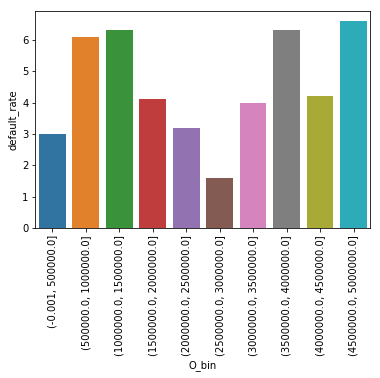

In [136]:
bp = sns.barplot(x='O_bin', y='default_rate', data=agg_bal)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

Cant really say much based on the above plot

#### Total No of Trades

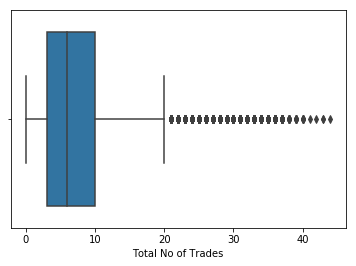

In [137]:
sns.boxplot(x='Total No of Trades', data=cr)
plt.show()

In [138]:
# grouping the outliers of trades > 20 as 21
cr['Total No of Trades'][cr['Total No of Trades']>20] = 21

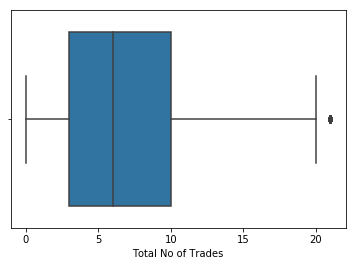

In [139]:
sns.boxplot(x='Total No of Trades', data=cr)
plt.show()

We will bucket the data again

In [140]:
# bucketing the data based on number of trades by the customer to study the default rate
bins = np.arange(0,cr['Total No of Trades'].max() + 5, 5) 
cr['T_bin'] = pd.cut(cr['Total No of Trades'], bins, include_lowest=True)

In [141]:
No_of_prospect_trades = cr.groupby('T_bin')['Performance Tag'].count().reset_index(name = 'noof_prospect')
count_prospects_trades = cr[cr['Performance Tag']==1].groupby('T_bin')['Performance Tag'].count().reset_index(name = 'count_prospect')

agg_trades = No_of_prospect_trades.merge(count_prospects_trades, on='T_bin')
agg_trades['default_rate'] = 100*(agg_trades['count_prospect']/agg_trades['noof_prospect']).round(3)

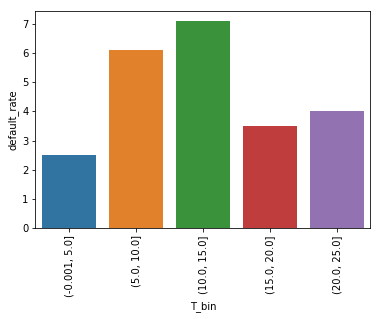

In [142]:
bp = sns.barplot(x='T_bin', y='default_rate', data=agg_trades)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

Customers who have done trades between 5 to 15 times are more likely to default

#### Presence of open auto loan

In [143]:
cr['Presence of open auto loan'].value_counts(dropna=False)

0    65262
1     6033
Name: Presence of open auto loan, dtype: int64

In [144]:
count_prospects_auto = cr.groupby('Presence of open auto loan')['Performance Tag'].sum().reset_index(name = 'count_prospect')
No_of_prospect_auto = cr.groupby('Presence of open auto loan')['Performance Tag'].count().reset_index(name = 'noof_prospect')

agg_auto = count_prospects_auto.merge(No_of_prospect_auto, on = 'Presence of open auto loan')
agg_auto['default_rate'] = 100*(agg_auto['count_prospect']/agg_auto['noof_prospect']).round(3)

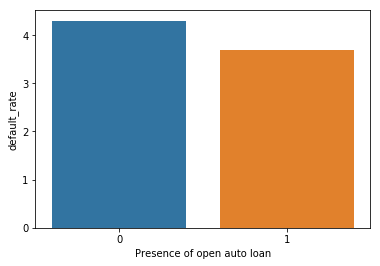

In [145]:
bp = sns.barplot(x='Presence of open auto loan', y='default_rate', data=agg_auto)
bp.set_xticklabels(bp.get_xticklabels(),rotation=0)
plt.show()

Same as home loan, people not having an open auto loan are more likely to default. But also number of people not having a running auto loan are also very less.

### Bivariate analysis on Credit Bureau data

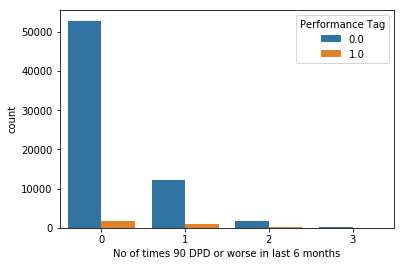

In [146]:
sns.countplot(data=cr, x = 'No of times 90 DPD or worse in last 6 months',hue = 'Performance Tag')


No of defaulters are increasing with increase in no.of.times 90 DPD in last 6 months

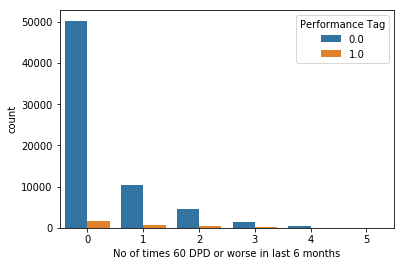

In [147]:
sns.countplot(data=cr, x = 'No of times 60 DPD or worse in last 6 months',hue = 'Performance Tag')


No of defaulters are increasing with increase in no.of.times 60 DPD in last 6 months

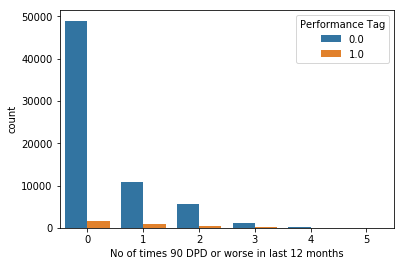

In [148]:
sns.countplot(data=cr, x = 'No of times 90 DPD or worse in last 12 months',hue = 'Performance Tag')


No of defaulters are increasing with increase in no.of.times 90 DPD in last 12 months

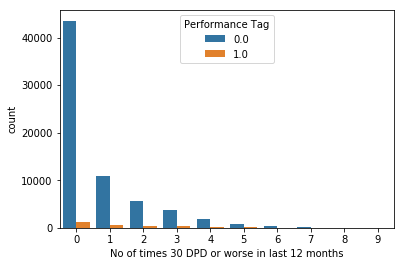

In [149]:
sns.countplot(data=cr, x = 'No of times 30 DPD or worse in last 12 months',hue = 'Performance Tag')


No of defaulters are increasing with increase in no.of.times 30 DPD in last 12 months

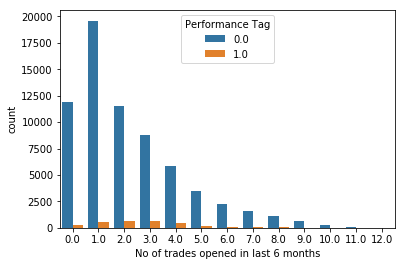

In [150]:
sns.countplot(data=cr, x = 'No of trades opened in last 6 months',hue = 'Performance Tag')


Trades which are open 4 times in last 6 months tends to default more

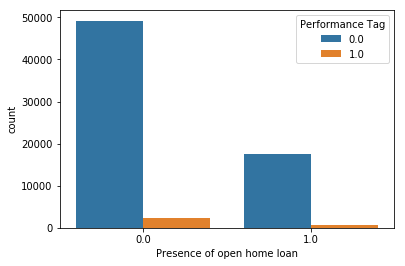

In [151]:
sns.countplot(data=cr, x = 'Presence of open home loan',hue = 'Performance Tag')


No appropriate pattern found in no of defaulters 

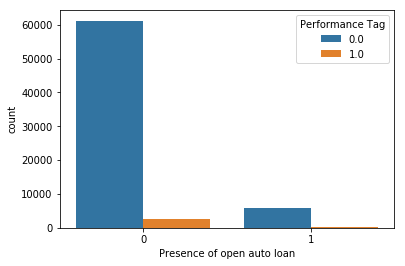

In [152]:
sns.countplot(data=cr, x = 'Presence of open auto loan',hue = 'Performance Tag')


No appropriate pattern found in no of defaulters 

### Summary from EDA on Demographic and Credit Bureau datasets

  ##### 1. Demographic variables are not very good predictors of defaulting. Only below 3 variables seems significant.
      -Income
      -No.of.months.in.current.residence
      -No.of.months.in.current.company

  ##### 2. credit bureau dataset has many variables which seems like good predictors of defaulters.
      -No.of.times.90.DPD.or.worse.in.last.6.months
      -No.of.times.60.DPD.or.worse.in.last.6.months
      -No.of.times.30.DPD.or.worse.in.last.6.months
      -No.of.times.90.DPD.or.worse.in.last.12.months
      -No.of.times.60.DPD.or.worse.in.last.12.months
      -No.of.times.30.DPD.or.worse.in.last.12.months
      -No.of.trades.opened.in.last.6.months
      -No.of.PL.trades.opened.in.last.6.months
      -No.of.PL.trades.opened.in.last.12.months

### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [153]:
# inspect the columns

demo.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'age_bins', 'Income_bin', 'Residence_bin',
       'Employment_bin'],
      dtype='object')

In [154]:
# Droping the bin columns we had created for the purpose of data visualisation

demo = demo.drop(['age_bins', 'Income_bin','Residence_bin','Employment_bin'], axis = 1)

In [155]:
demo.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

In [156]:
cr.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag',
       'CC_bin', 'O_bin', 'T_bin'],
      dtype='object')

In [157]:
# Droping the bin columns we had created for the purpose of data visualisation
cr = cr.drop(['CC_bin', 'O_bin', 'T_bin'], axis = 1)

In [158]:
cr.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')

In [159]:
demo.shape

(71295, 12)

In [160]:
#checking for unique values in demographic dataset
demo.nunique()

Application ID                                 71292
Age                                               48
Gender                                             2
Marital Status (at the time of application)        2
No of dependents                                   5
Income                                            63
Education                                          5
Profession                                         3
Type of residence                                  5
No of months in current residence                121
No of months in current company                   78
Performance Tag                                    2
dtype: int64

In [161]:
cr.shape

(71295, 19)

In [162]:
cr.nunique()

Application ID                                                     71292
No of times 90 DPD or worse in last 6 months                           4
No of times 60 DPD or worse in last 6 months                           6
No of times 30 DPD or worse in last 6 months                           8
No of times 90 DPD or worse in last 12 months                          6
No of times 60 DPD or worse in last 12 months                          8
No of times 30 DPD or worse in last 12 months                         10
Avgas CC Utilization in last 12 months                               114
No of trades opened in last 6 months                                  13
No of trades opened in last 12 months                                 29
No of PL trades opened in last 6 months                                7
No of PL trades opened in last 12 months                              13
No of Inquiries in last 6 months (excluding home & auto loans)        11
No of Inquiries in last 12 months (excluding home &

From above we can see that there are duplicate values (Application Id) in demographic and credit bureau dataset

In [163]:
# find the Application IDs which have duplicate Values in demographic dataset
dup1 = demo['Application ID'].value_counts()
(dup1[dup1 > 1])

653287861    2
671989187    2
765011468    2
Name: Application ID, dtype: int64

In [164]:
# find the Application IDs which have duplicate Values in credit bureau dataset
dup2 = cr['Application ID'].value_counts()
(dup2[dup2 > 1])

653287861    2
671989187    2
765011468    2
Name: Application ID, dtype: int64

We can see that same application ids are duplicated in both the datasets and hence we shoose to drop these ids from both datasets

In [165]:
#dropping duplicate application id values
demo.drop(demo[demo['Application ID'].isin([653287861, 671989187, 765011468])].index, inplace=True)

cr.drop(cr[cr['Application ID'].isin([653287861, 671989187, 765011468])].index, inplace=True)

In [166]:
demo.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            0
Marital Status (at the time of application)       0
No of dependents                                  0
Income                                            0
Education                                       119
Profession                                        0
Type of residence                                 0
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [167]:
#checking null values in education
demo['Education'].value_counts(dropna = False)

Professional    24836
Masters         23970
Bachelor        17695
Phd              4548
Others            121
NaN               119
Name: Education, dtype: int64

From above  we see that we cannot really assign any of the existing values to the nulls. hence lets impute nulls with "Unknown"

In [168]:
demo["Education"] = demo["Education"].replace(np.nan,"Unknown")

Also, there are 1425 null values for performance tag, a null value for this field means credit card was never used
these records belongs to rejected applicants, lets remove them from demographic dataset

In [169]:
rejected_demo = demo[demo["Performance Tag"].isnull()]
demo = demo[~demo["Performance Tag"].isnull()]

In [170]:
demo.isnull().sum()

Application ID                                 0
Age                                            0
Gender                                         0
Marital Status (at the time of application)    0
No of dependents                               0
Income                                         0
Education                                      0
Profession                                     0
Type of residence                              0
No of months in current residence              0
No of months in current company                0
Performance Tag                                0
dtype: int64

In [171]:
demo.shape

(69864, 12)

We now have a clean demographic dataset.

now lets look at Credit bureau dataset

In [172]:
cr.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  0
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

Also, there are 1425 null values for performance tag, a null value for this field means credit card was never used these records belongs to rejected applicants, lets remove them from credit dataset

In [173]:
rejected_cr = cr[cr["Performance Tag"].isnull()]
cr = cr[~cr["Performance Tag"].isnull()]

In [174]:
cr['Presence of open home loan'].value_counts(dropna = False)

 0.0    51521
 1.0    18071
NaN       272
Name: Presence of open home loan, dtype: int64

In [175]:
#imputing this columnwith mode value 0
cr['Presence of open home loan'] = cr['Presence of open home loan'].replace(np.nan, 0)

In [176]:
# lets check the records where outstanding balance has null values
cr.loc[cr["Outstanding Balance"].isnull()]

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
10509,479431469,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10560,369436570,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10583,198567793,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10594,771962421,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10763,124126752,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10785,897124363,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10821,127042017,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10952,252694179,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10958,377993668,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10965,757235320,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0


From above we can see that total number of trades and Avg CC utiliztion in last 6 months was 0 wherever outstanding balance was 0. hence credit card was never used and we can safely impute thiese null values with 0.

In [177]:
cr["Outstanding Balance"] = cr["Outstanding Balance"].replace(np.nan, 0)
cr["Avgas CC Utilization in last 12 months"] = cr["Avgas CC Utilization in last 12 months"].replace(np.nan,0)

In [178]:
cr.isnull().sum()

Application ID                                                     0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of times 30 DPD or worse in last 12 months                      0
Avgas CC Utilization in last 12 months                             0
No of trades opened in last 6 months                               0
No of trades opened in last 12 months                              0
No of PL trades opened in last 6 months                            0
No of PL trades opened in last 12 months                           0
No of Inquiries in last 6 months (excluding home & auto loans)     0
No of Inquiries in last 12 months (excluding home & auto loans)    0
Presence of open home loan        

In [179]:
cr.shape

(69864, 19)

We now also have cleaned credit bureau dataset

Now we can create a master dataset combining both demographic and cred bureau datsets

### Master Dataset

In [180]:
#dropping performance tag column from credit bureau dataset as it is already present in demographic dataset
cr.drop("Performance Tag",axis =1 , inplace = True)

In [181]:
# merging two datsets to create master dataset
master = pd.merge(demo,cr, how="inner", on = "Application ID")
master.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0.0,1,0,0,0,0,1.0,3014283.0,4,0


In [182]:
master.shape

(69864, 29)

In [183]:
#checking null values in master dataset
master.isnull().sum()

Application ID                                                     0
Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in las

Now we can also create a master set for rejected customers using the rejected dataframes we created earlier for both demographic and credit datsets

In [184]:
#removing Performance Tag from rejeted_cr df as this column is already repeated in rejected_demo df
rejected_cr = rejected_cr.drop("Performance Tag",axis = 1)

In [185]:
#merging the two rejected dfs to create a master df for rejected customers
rejected_master = pd.merge(rejected_demo,rejected_cr, how="inner", on = "Application ID")

In [186]:
rejected_master.shape

(1425, 29)

In [360]:
rejected_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 28 columns):
Application ID                                                     1425 non-null int64
Age                                                                1425 non-null int64
Gender                                                             1425 non-null object
Marital Status (at the time of application)                        1425 non-null object
No of dependents                                                   1425 non-null float64
Income                                                             1425 non-null float64
Education                                                          1425 non-null object
Profession                                                         1425 non-null object
Type of residence                                                  1425 non-null object
No of months in current residence                                  1425 non-null int64
No of months i

In [361]:
rejected_master['Avgas CC Utilization in last 12 months'] = rejected_master['Avgas CC Utilization in last 12 months'].replace(np.nan,0)

In [362]:
rejected_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 28 columns):
Application ID                                                     1425 non-null int64
Age                                                                1425 non-null int64
Gender                                                             1425 non-null object
Marital Status (at the time of application)                        1425 non-null object
No of dependents                                                   1425 non-null float64
Income                                                             1425 non-null float64
Education                                                          1425 non-null object
Profession                                                         1425 non-null object
Type of residence                                                  1425 non-null object
No of months in current residence                                  1425 non-null int64
No of months i

## WOE and Information Value Analysis

### Master dataset

In [187]:
# defining IV and WOE function
def iv_woe_func(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    ivDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x, edge = pd.qcut(data[ivars], bins, retbins=True, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'x1': binned_x.map(lambda i: i.right), 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'x1': data[ivars], 'y': data[target]})
        d = d0.groupby(["x", "x1"], as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'Maxval', 'N', 'Events']
        d['Events_Rate'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['Non-Events_Rate'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['Events_Rate']/d['Non-Events_Rate'])
        d['IV'] = d['WoE'] * (d['Events_Rate'] - d['Non-Events_Rate'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        ivDF=pd.concat([ivDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return ivDF, woeDF

In [188]:
# deriving the WOE and IV values for our master dataset
master_iv, master_woe = iv_woe_func(data=master, target='Performance Tag', bins=10, show_woe=True)

Information value of Application ID is 0.00148
         Variable                       Cutoff        Maxval     N  Events  \
0  Application ID     (100449.999, 99488056.4]  9.948806e+07  6987   292.0   
1  Application ID    (99488056.4, 199459947.4]  1.994599e+08  6986   276.0   
2  Application ID   (199459947.4, 298561024.0]  2.985610e+08  6986   305.0   
3  Application ID   (298561024.0, 399368856.6]  3.993689e+08  6987   295.0   
4  Application ID   (399368856.6, 497955643.5]  4.979556e+08  6986   312.0   
5  Application ID   (497955643.5, 599089634.8]  5.990896e+08  6986   281.0   
6  Application ID   (599089634.8, 699936204.5]  6.999362e+08  6987   297.0   
7  Application ID   (699936204.5, 798890993.6]  7.988910e+08  6986   305.0   
8  Application ID   (798890993.6, 899547674.7]  8.995477e+08  6986   285.0   
9  Application ID  (899547674.7, 1000084142.0]  1.000084e+09  6987   299.0   

   Events_Rate  Non-Events  Non-Events_Rate       WoE            IV  
0     0.099084      6695

                                       Variable  Cutoff  Maxval      N  \
0  No of times 90 DPD or worse in last 6 months       0       0  54662   
1  No of times 90 DPD or worse in last 6 months       1       1  13218   
2  No of times 90 DPD or worse in last 6 months       2       2   1776   
3  No of times 90 DPD or worse in last 6 months       3       3    208   

   Events  Events_Rate  Non-Events  Non-Events_Rate       WoE        IV  
0  1794.0     0.608755     52868.0         0.790053 -0.260685  0.047262  
1   970.0     0.329148     12248.0         0.183033  0.586843  0.085747  
2   160.0     0.054293      1616.0         0.024149  0.810130  0.024420  
3    23.0     0.007805       185.0         0.002765  1.037804  0.005230  
Information value of No of times 60 DPD or worse in last 6 months is 0.211274
                                       Variable  Cutoff  Maxval      N  \
0  No of times 60 DPD or worse in last 6 months       0       0  51868   
1  No of times 60 DPD or worse in

                                   Variable         Cutoff Maxval      N  \
0  No of PL trades opened in last 12 months  (-0.001, 1.0]    1.0  32463   
1  No of PL trades opened in last 12 months     (1.0, 2.0]    2.0   6830   
2  No of PL trades opened in last 12 months     (2.0, 3.0]    3.0   8130   
3  No of PL trades opened in last 12 months     (3.0, 4.0]    4.0   7902   
4  No of PL trades opened in last 12 months     (4.0, 5.0]    5.0   6189   
5  No of PL trades opened in last 12 months     (5.0, 6.0]    6.0   4023   
6  No of PL trades opened in last 12 months    (6.0, 12.0]   12.0   4327   

   Events  Events_Rate  Non-Events  Non-Events_Rate       WoE        IV  
0   704.0     0.238887     31759.0         0.474603 -0.686488  0.161816  
1   366.0     0.124194      6464.0         0.096597  0.251295  0.006935  
2   507.0     0.172039      7623.0         0.113917  0.412251  0.023961  
3   535.0     0.181541      7367.0         0.110092  0.500166  0.035736  
4   391.0     0.13267

In [189]:
#Important variables
master_iv.sort_values(by = 'IV',ascending = False)

,Variable,IV
0,Avgas CC Utilization in last 12 months,0.299214
0,No of trades opened in last 12 months,0.293562
0,No of PL trades opened in last 12 months,0.258546
0,No of Inquiries in last 12 months (excluding h...,0.245249
0,Outstanding Balance,0.245079
0,No of times 30 DPD or worse in last 6 months,0.244250
0,Total No of Trades,0.232262
0,No of PL trades opened in last 6 months,0.224220
0,No of times 30 DPD or worse in last 12 months,0.218610
0,No of times 90 DPD or worse in last 12 months,0.215653


In [190]:
# fetching the variables with low predictive power havinf IV < 0.02
low_preds = master_iv.loc[master_iv['IV']<0.02, ['Variable']].values.tolist()
low_preds = np.concatenate(low_preds, axis=0)
low_preds

array(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Education', 'Profession ', 'Type of residence',
       'Presence of open home loan', 'Presence of open auto loan'],
      dtype='<U43')

In [191]:
# fetching the list of variables to be transformed
trans_list = master.columns.difference(['Performance Tag'])

trans_list

Index(['Age', 'Application ID', 'Avgas CC Utilization in last 12 months',
       'Education', 'Gender', 'Income',
       'Marital Status (at the time of application)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
       'Presence of open auto loan

In [192]:
# creating a dataframe for woe values
master_woe_df = pd.DataFrame()

# imputing the woe values with the resultant dataframe into a new dataframe
for var in trans_list:
    small_master_df = master_woe[master_woe['Variable'] == var]
    trans_dict = dict(zip(small_master_df.Maxval,small_master_df.WoE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(trans_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            master_woe_df[var] = master[var].apply(lambda x: eval(replace_cmd))
        except:
            master_woe_df[var] = master[var].apply(lambda x: eval(replace_cmd1))

In [193]:
master_woe_df.head()

,Age,Application ID,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of Inquiries in last 6 months (excluding home & auto loans),No of PL trades opened in last 12 months,...,No of times 90 DPD or worse in last 12 months,No of times 90 DPD or worse in last 6 months,No of trades opened in last 12 months,No of trades opened in last 6 months,Outstanding Balance,Presence of open auto loan,Presence of open home loan,Profession,Total No of Trades,Type of residence
0,0.032840,0.015039,-0.702930,0.017390,0.032129,-0.272909,-0.004102,-0.828287,-0.320076,-0.686488,...,-0.356637,-0.260685,-0.816404,-0.543248,-0.842680,0.011973,-0.236703,-0.028375,-0.447897,-0.004479
1,-0.016278,0.059694,-0.702930,-0.017933,-0.010133,-0.385540,-0.004102,-0.828287,-0.320076,-0.686488,...,-0.356637,-0.260685,-0.816404,-0.543248,-0.745618,0.011973,0.071794,-0.013343,-0.048845,-0.004479
2,0.031623,0.015039,-0.778505,0.017390,-0.010133,-0.169391,0.023383,-0.828287,-0.320076,-0.686488,...,-0.356637,-0.260685,-0.893936,-0.543248,-0.842680,0.011973,-0.236703,-0.013343,-0.877731,-0.004479
3,-0.044690,0.000973,-0.616345,0.017390,-0.010133,-0.385540,-0.004102,-0.828287,-0.320076,-0.686488,...,-0.356637,-0.260685,-0.893936,-0.543248,0.297154,-0.138237,-0.236703,0.091379,-0.447897,-0.004479
4,0.031623,-0.068288,-0.468047,-0.017933,0.032129,-0.169391,-0.004102,-0.828287,-0.320076,-0.686488,...,-0.356637,-0.260685,-0.893936,-0.543248,-0.842680,0.011973,-0.236703,-0.028375,-0.447897,-0.004479


In [194]:
# checking the non-zero values in the woe dataframe
master_woe_df.astype(bool).sum(axis=0)

Age                                                                69864
Application ID                                                     69864
Avgas CC Utilization in last 12 months                             69864
Education                                                          69864
Gender                                                             69864
Income                                                             69864
Marital Status (at the time of application)                        69864
No of Inquiries in last 12 months (excluding home & auto loans)    69864
No of Inquiries in last 6 months (excluding home & auto loans)     69864
No of PL trades opened in last 12 months                           69864
No of PL trades opened in last 6 months                            69864
No of dependents                                                   69864
No of months in current company                                    69864
No of months in current residence                  

From above, we can see that our data is clean and we can go ahead with model building exercise on the same

## Model Building

For model building we will take the below two approach:

- First we will build a logistic regression model with only the demoographic data to get idea about the predictive power of the application data

- Then we will use both the demographic and credit bureau data to build different kind of models (Logistic regression, Random Forest, Gradient boosting etc) 

### Logistic Regression on Demographic dataset

In [195]:
#checking columns for demographic data
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69864 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 69864 non-null int64
Age                                            69864 non-null int64
Gender                                         69864 non-null object
Marital Status (at the time of application)    69864 non-null object
No of dependents                               69864 non-null float64
Income                                         69864 non-null float64
Education                                      69864 non-null object
Profession                                     69864 non-null object
Type of residence                              69864 non-null object
No of months in current residence              69864 non-null int64
No of months in current company                69864 non-null int64
Performance Tag                                69864 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.9+ MB


In [196]:
# fetching the demographc data from the master woe dataframe
demo_woe_df = master_woe_df[['Application ID', 'Age', 'Education', 'Gender', 'Income', 'Marital Status (at the time of application)',
                             'No of dependents', 'No of months in current company', 
                             'No of months in current residence', 'Profession ',
                             'Type of residence']]

demo_woe_df.head()

,Application ID,Age,Education,Gender,Income,Marital Status (at the time of application),No of dependents,No of months in current company,No of months in current residence,Profession,Type of residence
0,0.015039,0.032840,0.017390,0.032129,-0.272909,-0.004102,-0.085198,-0.228795,-0.069182,-0.028375,-0.004479
1,0.059694,-0.016278,-0.017933,-0.010133,-0.385540,-0.004102,-0.025162,-0.149320,-0.069182,-0.013343,-0.004479
2,0.015039,0.031623,0.017390,-0.010133,-0.169391,0.023383,-0.085198,-0.254889,-0.069182,-0.013343,-0.004479
3,0.000973,-0.044690,0.017390,-0.010133,-0.385540,-0.004102,0.040040,-0.254889,0.121460,0.091379,-0.004479
4,-0.068288,0.031623,-0.017933,0.032129,-0.169391,-0.004102,0.004346,-0.149320,-0.069182,-0.028375,-0.004479


#### Test Train Split



In [197]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [198]:
# Putting feature variable to X
X = demo_woe_df.drop(['Application ID'],axis=1)

# Putting response variable to y
y = master['Performance Tag']

In [199]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [200]:
X_train.head()

,Age,Education,Gender,Income,Marital Status (at the time of application),No of dependents,No of months in current company,No of months in current residence,Profession,Type of residence
16415,0.011283,-0.017933,-0.010133,-0.169391,-0.004102,0.053977,0.102103,-0.25289,-0.013343,-0.004479
34570,0.032840,0.007904,-0.010133,-0.169391,-0.004102,0.004346,-0.228795,-0.25289,-0.028375,-0.004479
61611,0.031623,-0.029557,0.032129,0.079062,0.023383,-0.085198,0.183288,0.47319,0.091379,-0.004479
1771,-0.016278,0.017390,-0.010133,-0.146555,0.023383,0.053977,-0.068492,0.12146,-0.028375,0.080756
10562,0.047189,0.017390,-0.010133,-0.169391,-0.004102,-0.025162,-0.228795,-0.25289,0.091379,-0.004479


Now that the data preparation step is complete, we will jump straight into modelling



#### Logistic Regression with all the variables

In [201]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [202]:
# Fitting the model
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [203]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48893
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8433.7
Date:                Mon, 02 Mar 2020   Deviance:                       16867.
Time:                        11:37:51   Pearson chi2:                 4.90e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -3.1216      0.023   -136.784      0.000      -3.166      -3.077
Age                                             0.8233      0.358      2.298      0.022       0.121       1.525
Education                                       0.6663      0.765      0.871      0.384      -0.833       2.166
Gender                                          1.1840      1.243      0.953      0.341      -1.252       3.620
Income                                          0.8199      0.110      7.427      0.000       0.604       1.036
Marital Status (at the time of application)    -0.2807      2.305     -0.122      0.903      -4.798       4.237
No of dependents                                0.5857      0.440      1.332      0.183      -0.276       1.448
No of months in current company                 0.8963      0.151      5.925      0.000       0.600       1.193
No of months in current residence               0.8580      0.084     10.247      0.000       0.694       1.022
Profession                                      0.7848      0.473      1.661      0.097      -0.141       1.711
Type of residence                               0.2629      0.727      0.362      0.718      -1.162       1.688
===============================================================================================================
"""

The above model has large number of insignificant columns and hence we will try refinfing this model using PCA and RFE

### Logistic regression with RFE

In [204]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#class imbalance
logreg = LogisticRegression(class_weight='balanced')

from sklearn.feature_selection import RFE
# RFE using 5 variables
rfe = RFE(logreg, 5)             
rfe = rfe.fit(X_train, y_train)

In [205]:

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Education', False, 4),
 ('Gender', True, 1),
 ('Income', True, 1),
 ('Marital Status (at the time of application)', False, 5),
 ('No of dependents', False, 3),
 ('No of months in current company', True, 1),
 ('No of months in current residence', True, 1),
 ('Profession ', False, 2),
 ('Type of residence', False, 6)]

In [206]:
## list of all the selected variables
col = X_train.columns[rfe.support_]
col

Index(['Age', 'Gender', 'Income', 'No of months in current company',
       'No of months in current residence'],
      dtype='object')

In [207]:
# model building with above selected variables
X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48898
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8436.3
Date:                Mon, 02 Mar 2020   Deviance:                       16873.
Time:                        11:37:52   Pearson chi2:                 4.90e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1218      0.023   -136.831      0.000      -3.166      -3.077
Age                                   0.8095      0.358      2.263      0.024       0.109       1.511
Gender                                1.1916      1.243      0.959      0.338      -1.244       3.627
Income                                0.8224      0.110      7.454      0.000       0.606       1.039
No of months in current company       0.8958      0.151      5.923      0.000       0.599       1.192
No of months in current residence     0.8617      0.084     10.296      0.000       0.698       1.026
=====================================================================================================
"""

Gender is insignificant with high p value and hence we will drop

In [208]:
col = col.drop('Gender',1)
col


Index(['Age', 'Income', 'No of months in current company',
       'No of months in current residence'],
      dtype='object')

In [209]:
#re-run the model
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48899
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8436.8
Date:                Mon, 02 Mar 2020   Deviance:                       16874.
Time:                        11:37:53   Pearson chi2:                 4.90e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1217      0.023   -136.839      0.000      -3.166      -3.077
Age                                   0.8086      0.358      2.261      0.024       0.108       1.510
Income                                0.8217      0.110      7.448      0.000       0.605       1.038
No of months in current company       0.8957      0.151      5.922      0.000       0.599       1.192
No of months in current residence     0.8611      0.084     10.290      0.000       0.697       1.025
=====================================================================================================
"""

The p values above now seem all acceptable and we can now make predictions on train set

In [210]:
# make prediction on train data set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.03298625, 0.02515888, 0.07874106, 0.03871353, 0.02544502,
       0.06016413, 0.06480067, 0.02508034, 0.02432432, 0.03635485])

In [211]:
#creating a separate df with actual performance and predicted prob
y_train_pred_final = pd.DataFrame({'actual_performance':y_train.values, 'probability':y_train_pred})
y_train_pred_final.head()

,actual_performance,probability
0,0.0,0.032986
1,0.0,0.025159
2,1.0,0.078741
3,0.0,0.038714
4,0.0,0.025445


In [212]:
# Creating new column 'predicted' with 1 if probability > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_performance,probability,predicted
0,0.0,0.032986,0
1,0.0,0.025159,0
2,1.0,0.078741,0
3,0.0,0.038714,0
4,0.0,0.025445,0


In [213]:
# accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_performance, y_train_pred_final.predicted))

0.9577948634058564


In [214]:
confusion = metrics.confusion_matrix(y_train_pred_final.actual_performance, y_train_pred_final.predicted )
confusion

array([[46840,     0],
       [ 2064,     0]], dtype=int64)

In [215]:
#metrics beyond accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [216]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0

Although accuracy is high, but the sensitivity is 0 and we will need to improve this by selecting an optimal cut off

In [217]:
# Let us calculate specificity
TN / float(TN+FP)

1.0

#### ROC Curve

In [218]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [219]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.actual_performance, y_train_pred_final.probability, drop_intermediate = False )

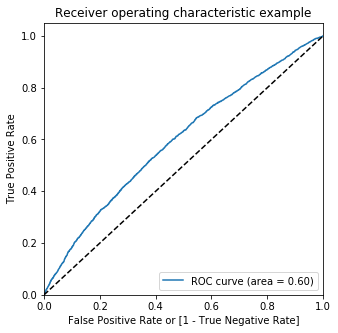

In [220]:
draw_roc(y_train_pred_final.actual_performance, y_train_pred_final.probability)

#### Finding Optimal cutoff

In [221]:

# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,actual_performance,probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.032986,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.025159,0,1,0,0,0,0,0,0,0,0,0
2,1.0,0.078741,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.038714,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.025445,0,1,0,0,0,0,0,0,0,0,0


In [222]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.actual_performance, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042205  1.000000  0.000000
0.1   0.1  0.957672  0.000484  0.999851
0.2   0.2  0.957795  0.000000  1.000000
0.3   0.3  0.957795  0.000000  1.000000
0.4   0.4  0.957795  0.000000  1.000000
0.5   0.5  0.957795  0.000000  1.000000
0.6   0.6  0.957795  0.000000  1.000000
0.7   0.7  0.957795  0.000000  1.000000
0.8   0.8  0.957795  0.000000  1.000000
0.9   0.9  0.957795  0.000000  1.000000


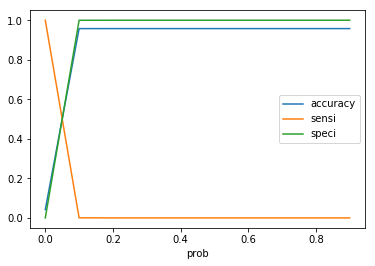

In [223]:
#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Optimal cutoff seems to be at 0.05

In [224]:

# let's make prediction using cut off point equal to 0.05
y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.05 else 0)
y_train_pred_final.head()

,actual_performance,probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.032986,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.025159,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,0.078741,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0.038714,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.025445,0,1,0,0,0,0,0,0,0,0,0,0


In [225]:
# check the overall accuracy with cut off point equal to 0.05
metrics.accuracy_score(y_train_pred_final.actual_performance, y_train_pred_final.final_predicted)

0.7318419761164731

In [226]:
# let's check confusion matrix with cut off point equal to 0.05
confusion_final = metrics.confusion_matrix(y_train_pred_final.actual_performance, y_train_pred_final.final_predicted )
confusion_final

array([[35011, 11829],
       [ 1285,   779]], dtype=int64)

In [227]:

TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [228]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.37742248062015504

In [229]:
# Let us calculate specificity
TN / float(TN+FP)

0.7474594363791631

In [230]:

# Calculate false postive rate
print(FP/ float(TN+FP))

0.2525405636208369


In [231]:
# Positive predictive value 
print (TP / float(TP+FP))

0.06178616751269036


In [232]:

# Negative predictive value
print (TN / float(TN+ FN))

0.9645966497685695


From above we can see that with Logistic regression using RFE, we got a sensitivity of around 38% which is very low. hencelets try improving this by using PCA.

### Logistic regression with PCA

In [233]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Principal Component Analysis

In [234]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [235]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0     47.31
1     76.17
2     92.19
3     95.12
4     96.97
5     98.48
6     99.22
7     99.71
8     99.93
9    100.00
dtype: float64


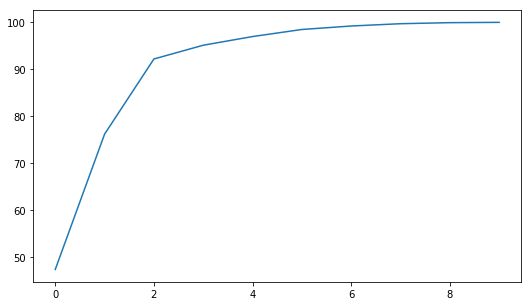

In [236]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)
plt.show()

From above we can see that almost 95% variance in dataset can be captured by 4 variables.

In [237]:
# create pipeline
PCA_VARS = 4
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [238]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.5923237362996892

In [239]:
from imblearn.metrics import sensitivity_specificity_support

In [240]:
# predict on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')



[[12013  8064]
 [  388   495]]
AUC:    	 0.61
Sensitivity: 	0.56
Specificity: 	0.6


From above we can see that we have inproved the sensitivity on our test set significantly but it is still very low. Lets try regularised logistic regression and see if we can improve this further.

In [241]:
# class imbalance
y_train.value_counts()/y_train.shape

0.0    0.957795
1.0    0.042205
Name: Performance Tag, dtype: float64

From above we see this is an imbalanced dataset, hence we will use StratifiedKFold sampling for this data set.

In [242]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [2,3,4,5], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [243]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3, 4, 5], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [244]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.5942668215955531
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 5}


In [245]:
# predict test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')



[[11995  8082]
 [  389   494]]
AUC:    	 0.61
Sensitivity: 	0.56
Specificity: 	0.6


In [246]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.60      0.74     20077
        1.0       0.06      0.56      0.10       883

avg / total       0.93      0.60      0.71     20960



__From above we can clearly see that both sensitivity and AUC score for logistic regression models(using RFE and PCA) developed on demographic dataset are very low. Lets try building a random forest model__


### Random Forest on demographic dataset

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [248]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [249]:
# predict on test data
y_pred = rfc.predict(X_test)

# checking report of the default model
print(classification_report(y_test,y_pred))

# printing confusion matrix
print(confusion_matrix(y_test,y_pred))

# accuracy score
print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     20077
        1.0       0.09      0.01      0.01       883

avg / total       0.92      0.95      0.94     20960

[[20008    69]
 [  876     7]]
0.9549141221374046


In [250]:
#auc
round(roc_auc_score(y_test,y_pred),2)

0.5

In [251]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test,y_pred, average='binary')
print(sensitivity)
print(specificity)

0.007927519818799546
0.9965632315584998


Again nfrom above we see that sesnisitivity with random forest is also as low as logistic regression and we can conclude that demographic dataset has a very llow predictive power and is not a good data to make predictions. this was expected from what we already saw from IV values and EDA

We will have to combine this dataset with credit bureau data to make better predictions

## Modelling on master dataset

We will start with logstic regression and then try decision trees and random forest models

#### Logistic Regression on master set



In [252]:
# creating final dataframe including the Performance Tag column
master_woe_df_final = pd.concat((master_woe_df, pd.DataFrame(master['Performance Tag'])), axis=1)

In [253]:
master_woe_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69864 entries, 0 to 69863
Data columns (total 29 columns):
Age                                                                69864 non-null float64
Application ID                                                     69864 non-null float64
Avgas CC Utilization in last 12 months                             69864 non-null float64
Education                                                          69864 non-null float64
Gender                                                             69864 non-null float64
Income                                                             69864 non-null float64
Marital Status (at the time of application)                        69864 non-null float64
No of Inquiries in last 12 months (excluding home & auto loans)    69864 non-null float64
No of Inquiries in last 6 months (excluding home & auto loans)     69864 non-null float64
No of PL trades opened in last 12 months                           69864 non-null

#### Test Train split

In [254]:
# Putting feature variable to X
X = master_woe_df_final.drop(['Application ID','Performance Tag'],axis=1)

# Putting response variable to y
y = master_woe_df_final['Performance Tag']

In [255]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#copies 
X_train_copy = X_train
X_test_copy = X_test

In [256]:
# check class imbalance
(y_train.value_counts()/y_train.shape)*100



#we have data imbalance which will need to be handled

0.0    95.779486
1.0     4.220514
Name: Performance Tag, dtype: float64

#### Logistic regression with all the variables

In [257]:
# Fitting the model
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [258]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48876
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8173.0
Date:                Mon, 02 Mar 2020   Deviance:                       16346.
Time:                        11:39:16   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1217      0.024   -131.805      0.000      -3.168      -3.075
Age                                                                 0.7965      0.360      2.215      0.027       0.092       1.501
Avgas CC Utilization in last 12 months                              0.3626      0.067      5.386      0.000       0.231       0.495
Education                                                           0.6774      0.769      0.881      0.378      -0.830       2.184
Gender                                                              1.2255      1.250      0.980      0.327      -1.225       3.676
Income                                                              0.1867      0.115      1.627      0.104      -0.038       0.412
Marital Status (at the time of application)                        -1.1199      2.318     -0.483      0.629      -5.663       3.424
No of Inquiries in last 12 months (excluding home & auto loans)     0.2900      0.078      3.701      0.000       0.136       0.443
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0265      0.085     -0.312      0.755      -0.193       0.140
No of PL trades opened in last 12 months                           -0.0835      0.113     -0.742      0.458      -0.304       0.137
No of PL trades opened in last 6 months                             0.0815      0.105      0.779      0.436      -0.123       0.286
No of dependents                                                    0.5329      0.441      1.208      0.227      -0.332       1.398
No of months in current company                                     0.2619      0.155      1.693      0.090      -0.041       0.565
No of months in current residence                                  -0.1324      0.097     -1.360      0.174      -0.323       0.058
No of times 30 DPD or worse in last 12 months                       0.1703      0.136      1.253      0.210      -0.096       0.437
No of times 30 DPD or worse in last 6 months                        0.4054      0.169      2.400      0.016       0.074       0.736
No of times 60 DPD or worse in last 12 months                      -0.0869      0.133     -0.651      0.515      -0.348       0.175
No of times 60 DPD or worse in last 6 months                       -0.1093      0.174     -0.627      0.531      -0.451       0.233
No of times 90 DPD or worse in last 12 months                      -0.0038      0.107     -0.035      0.972      -0.213       0.205
No of times 90 DPD or worse in last 6 months                        0.0284      0.129      0.220      0.826      -0.225       0.282
No of trades opened in last 12 months                               0.2466      0.137      1.800      0.072      -0.022       

From above we can see that there are a lot of insignificant variables with high p values > 0.05. Hence we will need to refine this model using RFE and PCA


#### Logistic regression with RFE

In [259]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#class imbalance
logreg = LogisticRegression(class_weight='balanced')

from sklearn.feature_selection import RFE
# RFE using 15 variables
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [260]:

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Avgas CC Utilization in last 12 months', True, 1),
 ('Education', True, 1),
 ('Gender', True, 1),
 ('Income', True, 1),
 ('Marital Status (at the time of application)', True, 1),
 ('No of Inquiries in last 12 months (excluding home & auto loans)', True, 1),
 ('No of Inquiries in last 6 months (excluding home & auto loans)', False, 9),
 ('No of PL trades opened in last 12 months', False, 6),
 ('No of PL trades opened in last 6 months', False, 7),
 ('No of dependents', True, 1),
 ('No of months in current company', True, 1),
 ('No of months in current residence', False, 3),
 ('No of times 30 DPD or worse in last 12 months', False, 4),
 ('No of times 30 DPD or worse in last 6 months', True, 1),
 ('No of times 60 DPD or worse in last 12 months', True, 1),
 ('No of times 60 DPD or worse in last 6 months', False, 5),
 ('No of times 90 DPD or worse in last 12 months', False, 13),
 ('No of times 90 DPD or worse in last 6 months', False, 12),
 ('No of trades opened in last

In [261]:
## list of all the selected variables
col = X_train.columns[rfe.support_]
col

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education', 'Gender',
       'Income', 'Marital Status (at the time of application)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of dependents', 'No of months in current company',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of trades opened in last 12 months', 'Outstanding Balance',
       'Presence of open auto loan', 'Profession '],
      dtype='object')

In [262]:
# model building with above selected variables
X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48888
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8176.0
Date:                Mon, 02 Mar 2020   Deviance:                       16352.
Time:                        11:39:31   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1220      0.024   -131.911      0.000      -3.168      -3.076
Age                                                                 0.7877      0.359      2.192      0.028       0.083       1.492
Avgas CC Utilization in last 12 months                              0.3389      0.064      5.333      0.000       0.214       0.463
Education                                                           0.6529      0.769      0.849      0.396      -0.855       2.160
Gender                                                              1.2668      1.250      1.014      0.311      -1.183       3.716
Income                                                              0.1857      0.115      1.620      0.105      -0.039       0.410
Marital Status (at the time of application)                        -1.0463      2.316     -0.452      0.651      -5.585       3.493
No of Inquiries in last 12 months (excluding home & auto loans)     0.2862      0.068      4.180      0.000       0.152       0.420
No of dependents                                                    0.5373      0.441      1.218      0.223      -0.327       1.402
No of months in current company                                     0.2657      0.155      1.719      0.086      -0.037       0.569
No of times 30 DPD or worse in last 6 months                        0.4521      0.101      4.460      0.000       0.253       0.651
No of times 60 DPD or worse in last 12 months                      -0.0840      0.108     -0.775      0.438      -0.297       0.129
No of trades opened in last 12 months                               0.2176      0.085      2.555      0.011       0.051       0.384
Outstanding Balance                                                 0.1915      0.081      2.351      0.019       0.032       0.351
Presence of open auto loan                                          0.3320      0.578      0.574      0.566      -0.801       1.465
Profession                                                          0.5664      0.475      1.193      0.233      -0.364       1.497
===================================================================================================================================
"""

In [263]:
#Marital status has highest p value and hence can be dropped
col = col.drop('Marital Status (at the time of application)', 1)
col

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education', 'Gender',
       'Income',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of dependents', 'No of months in current company',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of trades opened in last 12 months', 'Outstanding Balance',
       'Presence of open auto loan', 'Profession '],
      dtype='object')

In [264]:
#re-run the model
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48889
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8176.1
Date:                Mon, 02 Mar 2020   Deviance:                       16352.
Time:                        11:39:31   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1220      0.024   -131.912      0.000      -3.168      -3.076
Age                                                                 0.7802      0.359      2.172      0.030       0.076       1.484
Avgas CC Utilization in last 12 months                              0.3391      0.064      5.335      0.000       0.214       0.464
Education                                                           0.6533      0.769      0.850      0.396      -0.854       2.161
Gender                                                              1.2653      1.250      1.012      0.311      -1.184       3.715
Income                                                              0.1850      0.115      1.613      0.107      -0.040       0.410
No of Inquiries in last 12 months (excluding home & auto loans)     0.2865      0.068      4.184      0.000       0.152       0.421
No of dependents                                                    0.5359      0.441      1.215      0.224      -0.328       1.400
No of months in current company                                     0.2662      0.155      1.722      0.085      -0.037       0.569
No of times 30 DPD or worse in last 6 months                        0.4515      0.101      4.455      0.000       0.253       0.650
No of times 60 DPD or worse in last 12 months                      -0.0839      0.108     -0.774      0.439      -0.296       0.129
No of trades opened in last 12 months                               0.2173      0.085      2.552      0.011       0.050       0.384
Outstanding Balance                                                 0.1913      0.081      2.349      0.019       0.032       0.351
Presence of open auto loan                                          0.3317      0.578      0.574      0.566      -0.801       1.465
Profession                                                          0.5676      0.475      1.196      0.232      -0.363       1.498
===================================================================================================================================
"""

In [265]:
#checking VIF values
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [266]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,No of times 30 DPD or worse in last 6 months,5.27
9,No of times 60 DPD or worse in last 12 months,4.46
10,No of trades opened in last 12 months,4.46
11,Outstanding Balance,3.26
1,Avgas CC Utilization in last 12 months,2.63
5,No of Inquiries in last 12 months (excluding h...,2.40
4,Income,1.10
12,Presence of open auto loan,1.07
7,No of months in current company,1.05
0,Age,1.01


VIF values seem acceptable, hence we will drop on the basis of p values

In [267]:
# dropping Presence of open auto loan
col = col.drop('Presence of open auto loan',1)
col

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education', 'Gender',
       'Income',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of dependents', 'No of months in current company',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of trades opened in last 12 months', 'Outstanding Balance',
       'Profession '],
      dtype='object')

In [268]:
#re-run the model
X_train_sm = sm.add_constant(X_train[col])
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm16.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48890
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8176.3
Date:                Mon, 02 Mar 2020   Deviance:                       16353.
Time:                        11:39:34   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1220      0.024   -131.914      0.000      -3.168      -3.076
Age                                                                 0.7792      0.359      2.169      0.030       0.075       1.483
Avgas CC Utilization in last 12 months                              0.3402      0.064      5.354      0.000       0.216       0.465
Education                                                           0.6554      0.769      0.852      0.394      -0.852       2.163
Gender                                                              1.2628      1.250      1.010      0.312      -1.187       3.712
Income                                                              0.1865      0.115      1.627      0.104      -0.038       0.411
No of Inquiries in last 12 months (excluding home & auto loans)     0.2877      0.068      4.204      0.000       0.154       0.422
No of dependents                                                    0.5353      0.441      1.214      0.225      -0.329       1.400
No of months in current company                                     0.2669      0.155      1.727      0.084      -0.036       0.570
No of times 30 DPD or worse in last 6 months                        0.4517      0.101      4.456      0.000       0.253       0.650
No of times 60 DPD or worse in last 12 months                      -0.0845      0.108     -0.779      0.436      -0.297       0.128
No of trades opened in last 12 months                               0.2220      0.085      2.621      0.009       0.056       0.388
Outstanding Balance                                                 0.1846      0.080      2.296      0.022       0.027       0.342
Profession                                                          0.5686      0.475      1.198      0.231      -0.362       1.499
===================================================================================================================================
"""

In [269]:
# dropping No of times 60 DPD or worse in last 12 months
col = col.drop('No of times 60 DPD or worse in last 12 months',1)
col

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education', 'Gender',
       'Income',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of dependents', 'No of months in current company',
       'No of times 30 DPD or worse in last 6 months',
       'No of trades opened in last 12 months', 'Outstanding Balance',
       'Profession '],
      dtype='object')

In [270]:
#re-run the model
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48891
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8176.6
Date:                Mon, 02 Mar 2020   Deviance:                       16353.
Time:                        11:39:34   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1217      0.024   -131.942      0.000      -3.168      -3.075
Age                                                                 0.7797      0.359      2.170      0.030       0.076       1.484
Avgas CC Utilization in last 12 months                              0.3380      0.063      5.326      0.000       0.214       0.462
Education                                                           0.6484      0.769      0.843      0.399      -0.859       2.156
Gender                                                              1.2570      1.250      1.006      0.315      -1.193       3.707
Income                                                              0.1852      0.115      1.616      0.106      -0.039       0.410
No of Inquiries in last 12 months (excluding home & auto loans)     0.2886      0.068      4.214      0.000       0.154       0.423
No of dependents                                                    0.5307      0.441      1.204      0.229      -0.333       1.395
No of months in current company                                     0.2644      0.155      1.711      0.087      -0.038       0.567
No of times 30 DPD or worse in last 6 months                        0.3861      0.056      6.837      0.000       0.275       0.497
No of trades opened in last 12 months                               0.2222      0.085      2.622      0.009       0.056       0.388
Outstanding Balance                                                 0.1854      0.080      2.304      0.021       0.028       0.343
Profession                                                          0.5692      0.475      1.199      0.231      -0.361       1.500
===================================================================================================================================
"""

In [271]:
#dropping education and profession
col = col.drop(['Education', 'Profession '],1)
col

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Gender', 'Income',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of dependents', 'No of months in current company',
       'No of times 30 DPD or worse in last 6 months',
       'No of trades opened in last 12 months', 'Outstanding Balance'],
      dtype='object')

In [272]:

#re-run the model
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48893
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8177.7
Date:                Mon, 02 Mar 2020   Deviance:                       16355.
Time:                        11:39:34   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1217      0.024   -131.959      0.000      -3.168      -3.075
Age                                                                 0.7725      0.359      2.151      0.031       0.069       1.476
Avgas CC Utilization in last 12 months                              0.3387      0.063      5.336      0.000       0.214       0.463
Gender                                                              1.2715      1.250      1.017      0.309      -1.178       3.721
Income                                                              0.1841      0.115      1.607      0.108      -0.041       0.409
No of Inquiries in last 12 months (excluding home & auto loans)     0.2888      0.068      4.217      0.000       0.155       0.423
No of dependents                                                    0.5274      0.441      1.196      0.232      -0.337       1.392
No of months in current company                                     0.2625      0.155      1.699      0.089      -0.040       0.565
No of times 30 DPD or worse in last 6 months                        0.3868      0.056      6.849      0.000       0.276       0.497
No of trades opened in last 12 months                               0.2217      0.085      2.616      0.009       0.056       0.388
Outstanding Balance                                                 0.1861      0.080      2.312      0.021       0.028       0.344
===================================================================================================================================
"""

In [273]:
#checking vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,No of trades opened in last 12 months,4.37
9,Outstanding Balance,3.05
1,Avgas CC Utilization in last 12 months,2.61
4,No of Inquiries in last 12 months (excluding h...,2.39
7,No of times 30 DPD or worse in last 6 months,1.80
3,Income,1.10
6,No of months in current company,1.05
0,Age,1.01
2,Gender,1.00
5,No of dependents,1.00


As seen above, VIF are all less than 5 and hence continue dropping based on p values > 0.05

In [274]:
col = col.drop(['Gender', 'No of dependents'],1)
col

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Income',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of months in current company',
       'No of times 30 DPD or worse in last 6 months',
       'No of trades opened in last 12 months', 'Outstanding Balance'],
      dtype='object')

In [275]:
#re-run the model
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48895
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8178.9
Date:                Mon, 02 Mar 2020   Deviance:                       16358.
Time:                        11:39:35   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1218      0.024   -131.978      0.000      -3.168      -3.075
Age                                                                 0.7701      0.359      2.145      0.032       0.066       1.474
Avgas CC Utilization in last 12 months                              0.3386      0.063      5.332      0.000       0.214       0.463
Income                                                              0.1860      0.115      1.623      0.105      -0.039       0.411
No of Inquiries in last 12 months (excluding home & auto loans)     0.2889      0.068      4.219      0.000       0.155       0.423
No of months in current company                                     0.2626      0.155      1.700      0.089      -0.040       0.566
No of times 30 DPD or worse in last 6 months                        0.3881      0.056      6.873      0.000       0.277       0.499
No of trades opened in last 12 months                               0.2219      0.085      2.618      0.009       0.056       0.388
Outstanding Balance                                                 0.1847      0.080      2.295      0.022       0.027       0.342
===================================================================================================================================
"""

In [276]:
col = col.drop('Income',1)
col

Index(['Age', 'Avgas CC Utilization in last 12 months',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of months in current company',
       'No of times 30 DPD or worse in last 6 months',
       'No of trades opened in last 12 months', 'Outstanding Balance'],
      dtype='object')

In [277]:
#re-run the model
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48896
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8180.2
Date:                Mon, 02 Mar 2020   Deviance:                       16360.
Time:                        11:39:36   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1216      0.024   -132.007      0.000      -3.168      -3.075
Age                                                                 0.8058      0.358      2.249      0.025       0.104       1.508
Avgas CC Utilization in last 12 months                              0.3438      0.063      5.417      0.000       0.219       0.468
No of Inquiries in last 12 months (excluding home & auto loans)     0.2922      0.069      4.266      0.000       0.158       0.427
No of months in current company                                     0.2449      0.154      1.589      0.112      -0.057       0.547
No of times 30 DPD or worse in last 6 months                        0.3964      0.056      7.042      0.000       0.286       0.507
No of trades opened in last 12 months                               0.2276      0.085      2.685      0.007       0.061       0.394
Outstanding Balance                                                 0.1866      0.080      2.318      0.020       0.029       0.344
===================================================================================================================================
"""

In [278]:
col = col.drop('No of months in current company',1)
col

Index(['Age', 'Avgas CC Utilization in last 12 months',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of times 30 DPD or worse in last 6 months',
       'No of trades opened in last 12 months', 'Outstanding Balance'],
      dtype='object')

In [279]:
#re-run the model
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48904
Model:                            GLM   Df Residuals:                    48897
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8181.5
Date:                Mon, 02 Mar 2020   Deviance:                       16363.
Time:                        11:39:36   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1215      0.024   -132.031      0.000      -3.168      -3.075
Age                                                                 0.8043      0.358      2.245      0.025       0.102       1.507
Avgas CC Utilization in last 12 months                              0.3461      0.063      5.451      0.000       0.222       0.470
No of Inquiries in last 12 months (excluding home & auto loans)     0.2952      0.069      4.308      0.000       0.161       0.429
No of times 30 DPD or worse in last 6 months                        0.4025      0.056      7.163      0.000       0.292       0.513
No of trades opened in last 12 months                               0.2311      0.085      2.727      0.006       0.065       0.397
Outstanding Balance                                                 0.1869      0.080      2.322      0.020       0.029       0.345
===================================================================================================================================
"""

All p values are now acceptable as <0.05

In [280]:
#lets check vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,No of trades opened in last 12 months,4.36
5,Outstanding Balance,3.05
1,Avgas CC Utilization in last 12 months,2.60
2,No of Inquiries in last 12 months (excluding h...,2.38
3,No of times 30 DPD or worse in last 6 months,1.78
0,Age,1.00


VIFs are all also acceptable. We can go ahead and predict on this model now

In [281]:
# make prediction on train data set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.01808488, 0.05367046, 0.10350453, 0.01564085, 0.01630398,
       0.05490716, 0.04403318, 0.01433019, 0.0394597 , 0.01433019])

In [282]:

#creating a separate df with actual performance and predicted prob
y_train_pred_final = pd.DataFrame({'actual_performance':y_train.values, 'probability':y_train_pred})
y_train_pred_final.head()

,actual_performance,probability
0,0.0,0.018085
1,0.0,0.053670
2,1.0,0.103505
3,0.0,0.015641
4,0.0,0.016304


In [283]:

# Creating new column 'predicted' with 1 if probability > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_performance,probability,predicted
0,0.0,0.018085,0
1,0.0,0.053670,0
2,1.0,0.103505,0
3,0.0,0.015641,0
4,0.0,0.016304,0


In [284]:
# accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_performance, y_train_pred_final.predicted))

0.9577948634058564


In [285]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.actual_performance, y_train_pred_final.predicted )
confusion

array([[46840,     0],
       [ 2064,     0]], dtype=int64)

In [286]:
#metrics beyond accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [287]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0

In [288]:
# Let us calculate specificity
TN / float(TN+FP)

1.0


We will need to tune the cut off to improve the above sensitivity score

#### ROC curve

In [289]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [290]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.actual_performance, y_train_pred_final.probability, drop_intermediate = False )

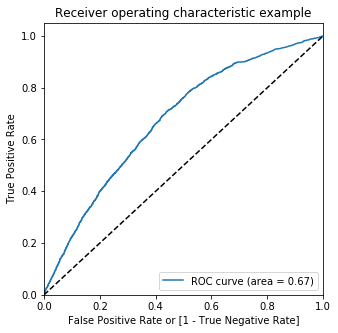

In [291]:
draw_roc(y_train_pred_final.actual_performance, y_train_pred_final.probability)

#### Finding optimal cut off

In [292]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,actual_performance,probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.018085,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.053670,0,1,0,0,0,0,0,0,0,0,0
2,1.0,0.103505,0,1,1,0,0,0,0,0,0,0,0
3,0.0,0.015641,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.016304,0,1,0,0,0,0,0,0,0,0,0


In [293]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.actual_performance, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042205  1.000000  0.000000
0.1   0.1  0.954973  0.012597  0.996499
0.2   0.2  0.957795  0.000000  1.000000
0.3   0.3  0.957795  0.000000  1.000000
0.4   0.4  0.957795  0.000000  1.000000
0.5   0.5  0.957795  0.000000  1.000000
0.6   0.6  0.957795  0.000000  1.000000
0.7   0.7  0.957795  0.000000  1.000000
0.8   0.8  0.957795  0.000000  1.000000
0.9   0.9  0.957795  0.000000  1.000000


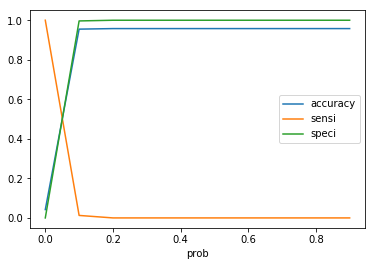

In [294]:
#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From above we can see optimal cutoff as 0.05

In [295]:
# let's make prediction using cut off point equal to 0.05
y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.05 else 0)
y_train_pred_final.head()

,actual_performance,probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.018085,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.053670,0,1,0,0,0,0,0,0,0,0,0,1
2,1.0,0.103505,0,1,1,0,0,0,0,0,0,0,0,1
3,0.0,0.015641,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.016304,0,1,0,0,0,0,0,0,0,0,0,0


In [296]:
# check the overall accuracy with cut off point equal to 0.05
metrics.accuracy_score(y_train_pred_final.actual_performance, y_train_pred_final.final_predicted)

0.6652625552102077

In [297]:
# let's check confusion matrix with cut off point equal to 0.1
confusion_final = metrics.confusion_matrix(y_train_pred_final.actual_performance, y_train_pred_final.final_predicted )
confusion_final

array([[31358, 15482],
       [  888,  1176]], dtype=int64)

In [298]:

TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [299]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5697674418604651

We can see above that sensitivity on train set has improved quite a bit from original cut off when chosen as 0.5 and also sensitivity is much better than what was with only demographic data (0.37).

However we still need to check this in test set and also build other mdels to check if we can improve upon this

In [300]:
# Let us calculate specificity
TN / float(TN+FP)

0.669470538001708

In [301]:

# Calculate false postive rate
print(FP/ float(TN+FP))

0.3305294619982921


In [302]:
# Positive predictive value 
print (TP / float(TP+FP))

0.07059671028935047


#### Predictions on test set

In [303]:
X_test_df = X_test[col]
X_test_df.head()

,Age,Avgas CC Utilization in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),No of times 30 DPD or worse in last 6 months,No of trades opened in last 12 months,Outstanding Balance
54362,0.032840,0.475001,0.510276,0.464274,0.484127,0.444455
12028,-0.073329,-0.702930,-0.828287,-0.386796,-0.816404,-0.924180
25144,0.062639,-0.728509,0.248061,-0.386796,0.316818,-0.171095
46373,0.032840,0.360496,0.142233,-0.386796,0.575732,0.444455
6891,0.011283,-0.728509,-0.828287,-0.386796,-0.893936,-0.842680


In [304]:
X_test_sm = sm.add_constant(X_test_df)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm) 
y_test_pred[:10]

54362    0.083302
12028    0.014989
25144    0.033425
46373    0.053762
6891     0.015847
60291    0.103265
53531    0.056551
27955    0.020655
22546    0.038834
69635    0.090500
dtype: float64

In [305]:
#Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [306]:
# concatanating the above two df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Performance Tag,0
54362,0.0,0.083302
12028,0.0,0.014989
25144,0.0,0.033425
46373,0.0,0.053762
6891,0.0,0.015847


In [307]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'predicted_probability', 'Performance Tag' : 'actual_performance'})
y_pred_final.head()

,actual_performance,predicted_probability
54362,0.0,0.083302
12028,0.0,0.014989
25144,0.0,0.033425
46373,0.0,0.053762
6891,0.0,0.015847


In [308]:
#finding predicted performance using optimal cut off of 0.05
y_pred_final['predicted_performance'] = y_pred_final.predicted_probability.map(lambda x: 1 if x > 0.05 else 0)

y_pred_final.head()

,actual_performance,predicted_probability,predicted_performance
54362,0.0,0.083302,1
12028,0.0,0.014989,0
25144,0.0,0.033425,0
46373,0.0,0.053762,1
6891,0.0,0.015847,0


In [309]:
#accuracy for test data set
metrics.accuracy_score(y_pred_final.actual_performance, y_pred_final.predicted_performance)

0.6652194656488549

In [310]:
# Let's check confusion matrix for test data set
confusion_test = metrics.confusion_matrix(y_pred_final.actual_performance, y_pred_final.predicted_performance)
confusion_test

array([[13422,  6655],
       [  362,   521]], dtype=int64)

In [311]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [312]:
# sensitivity of test set
TP / float(TP+FN)

0.5900339750849377

In [313]:
#  specificity
TN / float(TN+FP)

0.6685261742292176

In [314]:
from sklearn.metrics import precision_score
# precision
precision_score(y_pred_final.actual_performance, y_pred_final.predicted_performance)

0.07260312151616499

In [315]:
from sklearn.metrics import recall_score
# recall
recall_score(y_pred_final.actual_performance, y_pred_final.predicted_performance)

0.5900339750849377

From above we can see that our sensitivity on test set increased from train set. However we will try further models to check if we can improve this.

#### Logistic Regression with PCA

In [321]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [322]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [323]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      62.20
1      77.09
2      81.33
3      84.96
4      87.52
5      89.15
6      90.61
7      91.84
8      93.05
9      94.20
10     95.30
11     96.09
12     96.75
13     97.39
14     98.01
15     98.60
16     99.10
17     99.47
18     99.64
19     99.76
20     99.83
21     99.89
22     99.94
23     99.97
24     99.99
25    100.00
26    100.00
dtype: float64


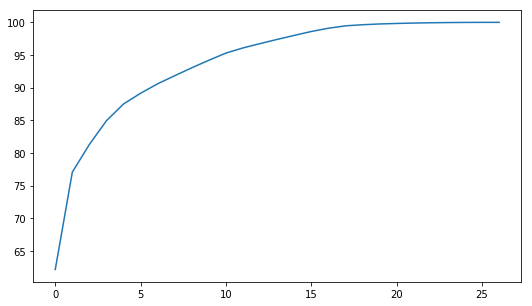

In [324]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)
plt.show()

Almost 95% of the variance can be captured by 10 variables

In [325]:
# create pipeline
PCA_VARS = 10
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [326]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.5910968427940455

In [327]:
from imblearn.metrics import sensitivity_specificity_support

In [328]:
# predict on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')



[[11783  8294]
 [  275   608]]
AUC:    	 0.68
Sensitivity: 	0.69
Specificity: 	0.59


From above we can see that we have inproved the sensitivity on our test set significantly but it is still very low. Lets try regularised logistic regression and see if we can improve this further.

In [329]:
# class imbalance
y_train.value_counts()/y_train.shape

0.0    0.957795
1.0    0.042205
Name: Performance Tag, dtype: float64

From above we see this is an imbalanced dataset, hence we will use StratifiedKFold sampling for this data set.

In [330]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [2,3,4,5], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [331]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3, 4, 5], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [332]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6697126860864694
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 4}


In [333]:
# predict test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob_train = model.predict_proba(X_train)[:, 1]

print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')



[[11763  8314]
 [  269   614]]
AUC:    	 0.67
Sensitivity: 	0.7
Specificity: 	0.59


In [334]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.59      0.73     20077
        1.0       0.07      0.70      0.13       883

avg / total       0.94      0.59      0.71     20960



#### Logistic Regrestion Model with PCA gives the best result till now. lets try building a random forest model now

### Random forest on master dataset

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [336]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [337]:
# predicting on the test data
def_pred = rfc.predict(X_test)

In [338]:
# Let's check the report of our default model
print(classification_report(y_test,def_pred))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     20077
        1.0       0.40      0.00      0.00       883

avg / total       0.93      0.96      0.94     20960



In [339]:
# confusion matrix
print(confusion_matrix(y_test,def_pred))

# accuracy score
print(accuracy_score(y_test,def_pred))

[[20074     3]
 [  881     2]]
0.957824427480916


Sensitivity for defaulters is very low. Lets try tuning the hyperparameters of random forest

In [340]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,4,5],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 5, 7]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid-search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring=['accuracy', 'recall'], refit='recall', 
                          cv = 3, n_jobs = -1,verbose = 1)

In [341]:
# Fit the grid-search to data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 15.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit='recall', return_train_score='warn',
       scoring=['accuracy', 'recall'], verbose=1)

In [344]:
# print the optimal accuracy score and hyperparameters
print('We can get an accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get an accuracy of 0.0 using {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [345]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=3,
                             n_estimators=100)

In [346]:
# model fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [347]:
# predict
y_pred = rfc.predict(X_test)

In [349]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     20077
        1.0       0.00      0.00      0.00       883

avg / total       0.92      0.96      0.94     20960



C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [351]:
 #confusion matrix
print(confusion_matrix(y_test,y_pred))

# accuracy score
print(accuracy_score(y_test,y_pred))

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[20077     0]
 [  883     0]]
0.9578721374045801
Sensitivity: 	0.0
Specificity: 	1.0


__From above we can see that our sensitivity is almost 0 with random forest and hence we can conclude that Logistic Regression with regularized PCA was our best model with sensitivity of around 70%__

## Model predictability on Rejected Population

In [363]:
rejected_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 28 columns):
Application ID                                                     1425 non-null int64
Age                                                                1425 non-null int64
Gender                                                             1425 non-null object
Marital Status (at the time of application)                        1425 non-null object
No of dependents                                                   1425 non-null float64
Income                                                             1425 non-null float64
Education                                                          1425 non-null object
Profession                                                         1425 non-null object
Type of residence                                                  1425 non-null object
No of months in current residence                                  1425 non-null int64
No of months i

In [353]:
# remove the target column
rejected_master.drop('Performance Tag', inplace=True, axis=1)

In [364]:
# importing the woe dataframe
master_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 1
Data columns (total 10 columns):
Variable           187 non-null object
Cutoff             187 non-null object
Maxval             187 non-null object
N                  187 non-null int64
Events             187 non-null float64
Events_Rate        187 non-null float64
Non-Events         187 non-null float64
Non-Events_Rate    187 non-null float64
WoE                187 non-null float64
IV                 187 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 16.1+ KB


In [365]:
# fetching the list of variables to be transformed
trans_var_list = X_train.columns

# creating an empty dataframe for woe values imputed
rejected_woe_df = pd.DataFrame(
# imputing the woe values with the resultant dataframe into a new dataframe
for var in trans_var_list:
    small_credx_df = master_woe[master_woe['Variable'] == var]
    trans_dict = dict(zip(small_credx_df.Maxval,small_credx_df.WoE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(trans_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            rejected_woe_df[var] = rejected_master[var].apply(lambda x: eval(replace_cmd))
        except:
            rejected_woe_df[var] = rejected_master[var].apply(lambda x: eval(replace_cmd1))

In [366]:
# checking the resultant dataframe
rejected_woe_df.head()

,Age,Avgas CC Utilization in last 12 months,Education,Gender,Income,Marital Status (at the time of application),No of Inquiries in last 12 months (excluding home & auto loans),No of Inquiries in last 6 months (excluding home & auto loans),No of PL trades opened in last 12 months,No of PL trades opened in last 6 months,...,No of times 90 DPD or worse in last 12 months,No of times 90 DPD or worse in last 6 months,No of trades opened in last 12 months,No of trades opened in last 6 months,Outstanding Balance,Presence of open auto loan,Presence of open home loan,Profession,Total No of Trades,Type of residence
0,0.031623,0.475001,0.017390,-0.010133,0.353130,0.023383,0.248061,0.216134,0.100907,0.423571,...,0.508779,-0.260685,0.403396,0.524232,0.395681,0.011973,0.071794,-0.028375,0.375911,-0.004479
1,0.032840,-0.078897,0.007904,0.032129,0.079062,-0.004102,0.588355,0.554893,0.500166,0.423571,...,0.885508,0.586843,0.575732,0.435079,0.444455,0.011973,0.071794,0.091379,0.296668,-0.004479
2,0.032840,0.360496,-0.017933,-0.010133,0.139754,-0.004102,0.164304,-0.320076,0.500166,0.438391,...,0.885508,1.037804,0.575732,0.232903,0.434894,0.011973,0.071794,0.091379,0.512570,-0.004479
3,0.047189,0.360496,0.007904,-0.010133,0.115900,-0.004102,0.588355,0.328824,0.500166,0.199395,...,0.885508,0.586843,0.575732,0.232903,0.444455,0.011973,0.071794,-0.028375,0.512570,-0.004479
4,0.047189,0.568787,-0.029557,0.032129,0.079062,-0.004102,0.510276,0.554893,0.412251,0.438391,...,0.885508,0.810130,0.575732,0.435079,0.444455,-0.138237,0.071794,-0.028375,0.296668,-0.004479


In [367]:
# checking the Null values are converted to zero only
rejected_woe_df.astype(bool).sum(axis=0)

Age                                                                1425
Avgas CC Utilization in last 12 months                             1425
Education                                                          1425
Gender                                                             1425
Income                                                             1425
Marital Status (at the time of application)                        1425
No of Inquiries in last 12 months (excluding home & auto loans)    1425
No of Inquiries in last 6 months (excluding home & auto loans)     1425
No of PL trades opened in last 12 months                           1425
No of PL trades opened in last 6 months                            1425
No of dependents                                                   1425
No of months in current company                                    1425
No of months in current residence                                  1425
No of times 30 DPD or worse in last 12 months                   

In [368]:
# predict default using logistic with pca model
rej_pred = model.predict(rejected_woe_df)

In [369]:
print("The rejected dataset have ", sum(rej_pred), " defaulters out of the total ", len(rej_pred), " applicants.")

The rejected dataset have  1418.0  defaulters out of the total  1425  applicants.


From above, according to our model almost 99% of the applicants bare likely to default if issued the card

## Application Scorecard

#### Approved polulation

In [372]:
# fetching probability of non-default
app_scorecard = pd.DataFrame(model.predict_proba(master_woe_df_final.drop(["Application ID","Performance Tag"], axis = 1))[:, 0], columns = ['pred_prob_ndef'])
app_scorecard

,pred_prob_ndef
0,0.727812
1,0.720825
2,0.738142
3,0.690072
4,0.713071
5,0.724958
6,0.723731
7,0.715387
8,0.728882
9,0.720394


In [373]:
# calculating the odds of good(non-default)
app_scorecard['odds_ndef'] = app_scorecard['pred_prob_ndef']/(1-app_scorecard['pred_prob_ndef'])
app_scorecard

,pred_prob_ndef,odds_ndef
0,0.727812,2.673938
1,0.720825,2.581980
2,0.738142,2.818860
3,0.690072,2.226556
4,0.713071,2.485184
5,0.724958,2.635808
6,0.723731,2.619658
7,0.715387,2.513540
8,0.728882,2.688430
9,0.720394,2.576459


In [374]:
# calculate log of odds
app_scorecard['log_odds_ndef'] = np.log(app_scorecard['odds_ndef'])
app_scorecard

,pred_prob_ndef,odds_ndef,log_odds_ndef
0,0.727812,2.673938,0.983552
1,0.720825,2.581980,0.948557
2,0.738142,2.818860,1.036332
3,0.690072,2.226556,0.800456
4,0.713071,2.485184,0.910347
5,0.724958,2.635808,0.969190
6,0.723731,2.619658,0.963044
7,0.715387,2.513540,0.921692
8,0.728882,2.688430,0.988957
9,0.720394,2.576459,0.946416


According to the problem statement, our target score is 400, with the target odds 10 doubling every 20 points, hence 

Factor = 20/ln(2) = 28.853901              
Offset = 400 - 28.853901 * ln(10) = 333.561438        

Therefore, our score can be calculated as,               
Score = Offset + Factor * log(odds)

In [375]:
#calculating score
app_scorecard['score'] = 333.561438 + (28.853901 * app_scorecard['log_odds_ndef'])
app_scorecard

,pred_prob_ndef,odds_ndef,log_odds_ndef,score
0,0.727812,2.673938,0.983552,361.940758
1,0.720825,2.581980,0.948557,360.930996
2,0.738142,2.818860,1.036332,363.463670
3,0.690072,2.226556,0.800456,356.657719
4,0.713071,2.485184,0.910347,359.828494
5,0.724958,2.635808,0.969190,361.526348
6,0.723731,2.619658,0.963044,361.349008
7,0.715387,2.513540,0.921692,360.155846
8,0.728882,2.688430,0.988957,362.096712
9,0.720394,2.576459,0.946416,360.869234


In [376]:
print("Maximum score from the approved ", app_scorecard['score'].max())
print("Minimum score from the approved ", app_scorecard['score'].min())

Maximum score from the approved  364.23755365477325
Minimum score from the approved  302.3265844011436


### Application Scorecard for rejected applications

In [377]:
# fetching probability of non-default
app_scorecard_rejected = pd.DataFrame(model.predict_proba(rejected_woe_df)[:, 0], columns = ['pred_prob_ndef'])

# calculating the odds of good(non-default)
app_scorecard_rejected['odds_ndef'] = app_scorecard_rejected['pred_prob_ndef']/(1-app_scorecard_rejected['pred_prob_ndef'])

# calculate log of odds
app_scorecard_rejected['log_odds_ndef'] = np.log(app_scorecard_rejected['odds_ndef'])

app_scorecard_rejected['score'] = 333.561438 + (28.853901 * app_scorecard_rejected['log_odds_ndef'])
app_scorecard_rejected

,pred_prob_ndef,odds_ndef,log_odds_ndef,score
0,0.354012,0.548018,-0.601448,316.207317
1,0.339821,0.514740,-0.664093,314.399761
2,0.327775,0.487598,-0.718265,312.836692
3,0.295045,0.418530,-0.871007,308.429476
4,0.286013,0.400585,-0.914830,307.165027
5,0.339921,0.514970,-0.663647,314.412625
6,0.371776,0.591790,-0.524603,318.424584
7,0.324805,0.481054,-0.731776,312.446853
8,0.292043,0.412515,-0.885482,308.011838
9,0.287016,0.402556,-0.909921,307.306681


In [378]:
print("Maximum score from the rejected ", app_scorecard_rejected['score'].max())
print("Minimum score from the rejected ", app_scorecard_rejected['score'].min())

Maximum score from the rejected  338.9283602270404
Minimum score from the rejected  301.6274665902346


From above we can notice that while scores for approved application range from 302 to 364, the maximum score for rejected population is 340

### Model prediction of default

In [380]:
# predicting the default on the accepted population and adding to the scorecard
app_scorecard['prediction_default'] = model.predict(master_woe_df_final.drop(["Application ID","Performance Tag"], axis = 1))

# adding the predicted default on the rejected population to the scorecard
app_scorecard_rejected['prediction_default'] = rej_pred

In [381]:
app_scorecard.head()

,pred_prob_ndef,odds_ndef,log_odds_ndef,score,prediction_default
0,0.727812,2.673938,0.983552,361.940758,0.0
1,0.720825,2.581980,0.948557,360.930996,0.0
2,0.738142,2.818860,1.036332,363.463670,0.0
3,0.690072,2.226556,0.800456,356.657719,0.0
4,0.713071,2.485184,0.910347,359.828494,0.0


In [382]:
app_scorecard_rejected.head()

,pred_prob_ndef,odds_ndef,log_odds_ndef,score,prediction_default
0,0.354012,0.548018,-0.601448,316.207317,1.0
1,0.339821,0.514740,-0.664093,314.399761,1.0
2,0.327775,0.487598,-0.718265,312.836692,1.0
3,0.295045,0.418530,-0.871007,308.429476,1.0
4,0.286013,0.400585,-0.914830,307.165027,1.0


In [383]:
# total predicted defaulters from accepted candidates
app_scorecard['prediction_default'].sum()

29753.0

In [384]:
# total predicted non-defaulters from rejected candidates
app_scorecard_rejected.loc[app_scorecard_rejected['prediction_default']==0, ['score']].count()

score    7
dtype: int64

From above we can see that there are 29753 out of 69864 approved candidates who are likely to deefault. Whereas there are 7 out of 1425 rejected candidates who were likely to be non defaulters

In [385]:
#checking score
print("Max score of predicted defaulters from accepted candidates is ", app_scorecard.loc[app_scorecard['prediction_default']==1, ['score']].max())
print("Min score of predicted defaulters from accepted candidates is ", app_scorecard.loc[app_scorecard['prediction_default']==1, ['score']].min())

Max score of predicted defaulters from accepted candidates is  score    333.561228
dtype: float64
Min score of predicted defaulters from accepted candidates is  score    302.326584
dtype: float64


In [386]:
print("Max score of predicted non-defaulters from rejected candidates is ", app_scorecard_rejected.loc[app_scorecard_rejected['prediction_default']==0, ['score']].max())
print("Min score of predicted non-defaulters from rejected candidates is ", app_scorecard_rejected.loc[app_scorecard_rejected['prediction_default']==0, ['score']].min())

Max score of predicted non-defaulters from rejected candidates is  score    338.92836
dtype: float64
Min score of predicted non-defaulters from rejected candidates is  score    333.725133
dtype: float64


From above we can see that it is difficult to predic the behavior of candidates with scores of around 332-335 as there seems to be a clash between defaulters and non defaulters as predicted by our model.

__Hence the cut off score should be 335__

## Financial Benefit Assessment

In [388]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69864 entries, 0 to 69863
Data columns (total 29 columns):
Application ID                                                     69864 non-null int64
Age                                                                69864 non-null int64
Gender                                                             69864 non-null object
Marital Status (at the time of application)                        69864 non-null object
No of dependents                                                   69864 non-null float64
Income                                                             69864 non-null float64
Education                                                          69864 non-null object
Profession                                                         69864 non-null object
Type of residence                                                  69864 non-null object
No of months in current residence                                  69864 non-null int64
No

In [389]:
# checking the average outstanding balance of defaulters
round(master.loc[master['Performance Tag']==1, ['Outstanding Balance']].mean(), 2)

Outstanding Balance    1257205.37
dtype: float64

Avg outstanding balance per defaulter is approx 12.6 lacs. Lets assume, bank is abe to retrieve 25% of this amount. We are still left with approx 942903 credit loss per defaulter

In [390]:
# checking the total outstanding balance of non-defaulters who have delayed their payment atleast once in past 12 months
master[(master['Performance Tag']==0) & (master['No of times 90 DPD or worse in last 12 months'] + master['No of times 60 DPD or worse in last 12 months'] + master['No of times 30 DPD or worse in last 12 months'] >0)]['Outstanding Balance'].sum()

32217560675.0

We can observe that the total outstanding balance of non-defaulters who have made late payments atleast once in last 1 year is 32.2 billions. Lets assume that after deducting the expenses the bank gain 8% of total outstanding balance as interest income, which leaves us with the total gain of Rs. 2,577,404,854.

In [391]:
# getting the distribution of the defaulters
master['Performance Tag'].value_counts(dropna=False)

0.0    66917
1.0     2947
Name: Performance Tag, dtype: int64

 - Gain per non defaulter = 2577404854/66917 = Rs 38516
 - Credit loss from defaulters = 942903*2947 = Rs 2778735141

In [393]:
# adding the predicted default to the master df
master['prediction_default'] = app_scorecard['prediction_default']


In [394]:
# calculate the no of defaulters reported correctly by the model
master[(master['Performance Tag']==1) & (master['prediction_default']==1)]['Performance Tag'].count()

2006

In [395]:
# calculate the no of defaulters reported incorrectly by the model
master[(master['Performance Tag']==1) & (master['prediction_default']==0)]['Performance Tag'].count()

941

In [396]:
# calculate the no of non-defaulters reported incorrectly by the model
master[(master['Performance Tag']==0) & (master['prediction_default']==1)]['prediction_default'].count()

27747

There are 2006 defaulters which are rejected by the model saving the bank Rs.(2006 * 942903) = Rs.1891469436.
Also there are 27747 non-defaulters which are rejected by the model incurring a loss of interest Rs.(27747 * 38516) = Rs.1068703452.

Therefore if using the model for auto approval/rejection we save Rs.822,765,984.